In [1]:
# .libPaths("/home/kostyadovnar/CVUT/BI-PRS/packages")
#.libPaths("/home/senyaaa/BI-PRS/packages")

library(eurostat)
library(dplyr)
library(ggplot2)
library(corrplot)

#1 sudo apt-get install libfontconfig1-dev libfreetype6-dev 
#2 install.packages("systemfonts")
#3 install.packages("svglite")
#4 install.packages("kableExtra")
#5 install.packages("vtable")
library(vtable)

library(moments) 
library(robustbase)
library(lmtest)
library(MASS)
library(sfsmisc)

options(width=160, repr.plot.width=12, repr.plot.height=8) 


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Loading required package: kableExtra


Attaching package: 'kableExtra'


The following object is masked from 'package:dplyr':

    group_rows


Warning message:
"package 'robustbase' was built under R version 4.3.3"
Warning message:
"package 'lmtest' was built under R version 4.3.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.3.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Warning message:
"package 'sfsmisc' was built under R version 4.3.3"

Attaching package: 'sfsmisc'


The following object is masked from 'package:dplyr':

    last




In [2]:
surname <- "pogodin"
L <- nchar(surname)
K <- 4
M <- ((K + L) * 47) %% 11 + 1
print(M)

[1] 1


## Import datasetu

Budeme uvažovat data z roku 2011+1 (2012) a HDP všech evropských zemí, o kterých jsou k dispozici pro daný rok údaje. Zajímat nás bude výpočet v tržních cenách (na_item=="B1GQ") a vyjádření v eurech na obyvatele (unit=="CP_EUR_HAB").

In [3]:
data <- get_eurostat(id = "nama_10_pc")

Table nama_10_pc cached at C:\Users\User\AppData\Local\Temp\RtmpIN0r1V/eurostat/d2ba4de4bc8ad8ffdcacfba97edd9eee.rds



In [4]:
data <- data %>%
  filter(na_item == "B1GQ" & unit == "CP_EUR_HAB" & TIME_PERIOD == as.Date("2012-01-01"))
data <- filter(data, !is.na(values))

V datasetu a ve sloupci geo vidíme položky jako je EA12 (Euro area - 12 countries (2001-2006)), EU15 atd, které pro nás irrelevatní, tak je odstraníme. Navíc odstraníme sloupce jako je frequency, unit, na_item, TIME_PERIOD

In [5]:
data

freq,unit,na_item,geo,TIME_PERIOD,values
<chr>,<chr>,<chr>,<chr>,<date>,<dbl>
A,CP_EUR_HAB,B1GQ,AL,2012-01-01,3300
A,CP_EUR_HAB,B1GQ,AT,2012-01-01,37820
A,CP_EUR_HAB,B1GQ,BE,2012-01-01,34770
A,CP_EUR_HAB,B1GQ,BG,2012-01-01,5780
A,CP_EUR_HAB,B1GQ,CH,2012-01-01,66780
A,CP_EUR_HAB,B1GQ,CY,2012-01-01,22570
A,CP_EUR_HAB,B1GQ,CZ,2012-01-01,15470
A,CP_EUR_HAB,B1GQ,DE,2012-01-01,34130
A,CP_EUR_HAB,B1GQ,DK,2012-01-01,45530


In [6]:
data$freq <- NULL
data$unit <- NULL
data$na_item <- NULL
data$TIME_PERIOD <- NULL
data <- subset(data, !(geo %in% c("EA12", "EA19", "EA20", "EU15", "EU27_2020", "EU28", "EA")))
data <- data %>% 
  rename(GDP = values)

In [7]:
data

geo,GDP
<chr>,<dbl>
AL,3300
AT,37820
BE,34770
BG,5780
CH,66780
CY,22570
CZ,15470
DE,34130
DK,45530


## Úloha 1

* Krátce prezentujte rozdělení HDP a jeho charakteristiky číselně i graficky.
* Diskutujte, které údaje o zemích by mohly mít na HDP vliv.

Z rychlého pohledu na histogram bych řekl, že data nejsou normálně rozdělená. V boxplotu vidíme dva outliery Luxemburg a Norsko.

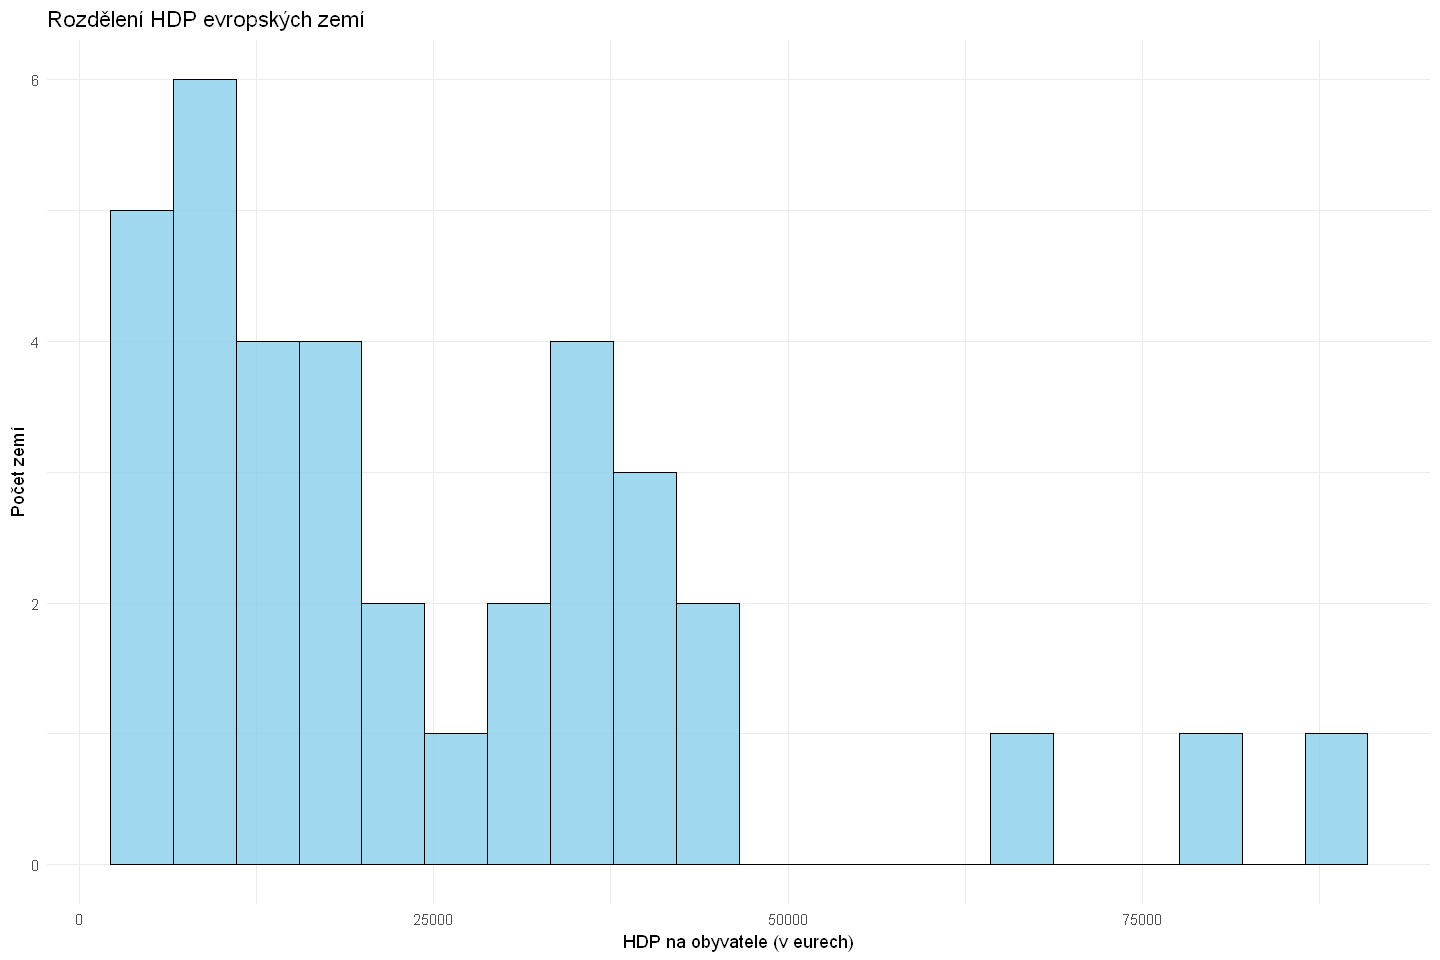

Průměr HDP: 25573.89 
Medián HDP: 17585 
Standardní odchylka HDP: 20620.2 
První kvartil HDP: 10387.5 
Medián HDP: 17585 
Třetí kvartil HDP: 36657.5 
Rozsah HDP: 84240 


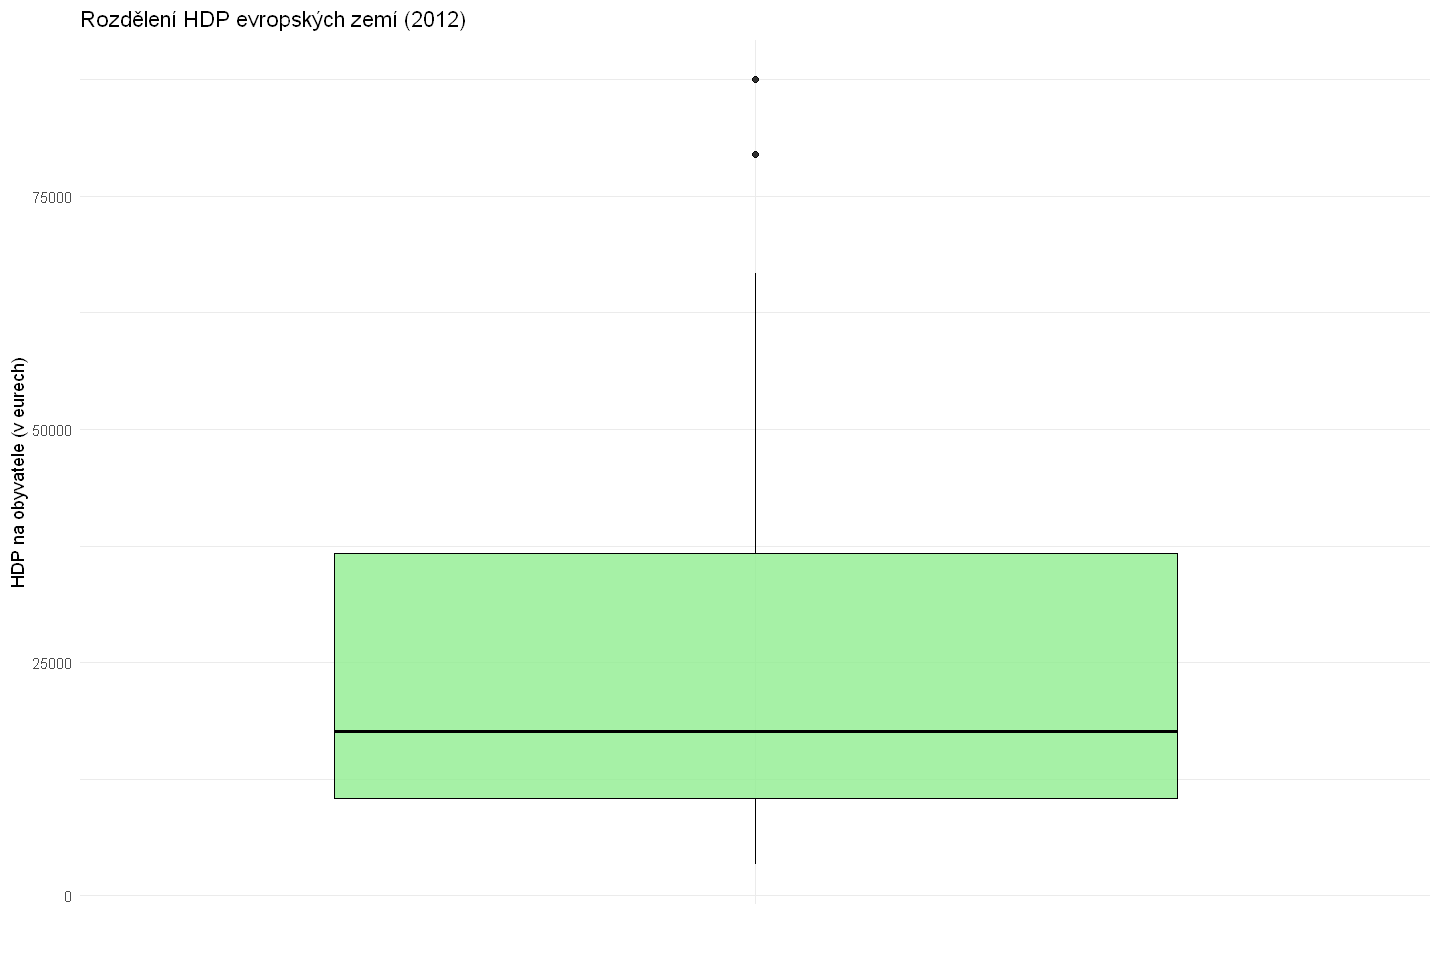

In [8]:
summary_stats <- summary(data$GDP)
mean_hdp <- mean(data$GDP)
median_hdp <- median(data$GDP)
std_dev_hdp <- sd(data$GDP)
quartiles_hdp <- quantile(data$GDP, probs = c(0.25, 0.5, 0.75))
range_hdp <- range(data$GDP)

ggplot(data, aes(x = GDP)) +
  geom_histogram(bins = 20, fill = "skyblue", color = "black", alpha = 0.8) +
  labs(title = "Rozdělení HDP evropských zemí",
       x = "HDP na obyvatele (v eurech)",
       y = "Počet zemí") +
  theme_minimal()

ggplot(data, aes(x = "", y = GDP)) +
  geom_boxplot(fill = "lightgreen", color = "black", alpha = 0.8) +
  labs(title = "Rozdělení HDP evropských zemí (2012)",
       x = "",
       y = "HDP na obyvatele (v eurech)") +
  theme_minimal()

cat("Průměr HDP:", mean_hdp, "\n")
cat("Medián HDP:", median_hdp, "\n")
cat("Standardní odchylka HDP:", std_dev_hdp, "\n")
cat("První kvartil HDP:", quartiles_hdp[1], "\n")
cat("Medián HDP:", quartiles_hdp[2], "\n")
cat("Třetí kvartil HDP:", quartiles_hdp[3], "\n")
cat("Rozsah HDP:", range_hdp[2] - range_hdp[1], "\n")

Existuje několik možných důvodů, proč by Lucembursko a Norsko mohly tvořit outliery 

1) Lucembursko a Norsko jsou známé svou vysokou úrovní ekonomické prosperity a bohatství.
2) Luxemburg - nízké daně z příjmu právnických osob, stabilní pracovní sila a vládní pobídka v oblasti investic, což při malém počtu obyvatel vede k neobvykle vysokému HDP na obyvatele.
3) Norsko - díky úspěchu v odvětví ropy a zemního plynu a v dalších špičkových průmyslových odvětvích, jako je lodní doprava, stavba lodí a akvakultura.

In [9]:
outliers <- boxplot.stats(data$GDP)$out

sorted_indices <- order(outliers, decreasing = TRUE)
sorted_outliers <- outliers[sorted_indices]

top_outliers <- sorted_outliers[1:3]

top_outlier_countries <- data$geo[which(data$GDP %in% top_outliers)]

top_outlier_countries

[1] "LU" "NO"

Q-Q plot, česky též kvantilový graf, vykresluje polohy výběrových kvantilů (z dat) versus polohy kvantilů vybraného teoretického rozdělení (např. normálního). Pokud by výběrové kvantily odpovídaly danému rozdělení, pak by ležely na přímce reprezentující právě toto rozdělení. Zase rychlým pohledem na Q-Q plot s normálním a exponenciálním rozdělením bych tipnul, že netvoří ani jedno z těchto rozdělení.

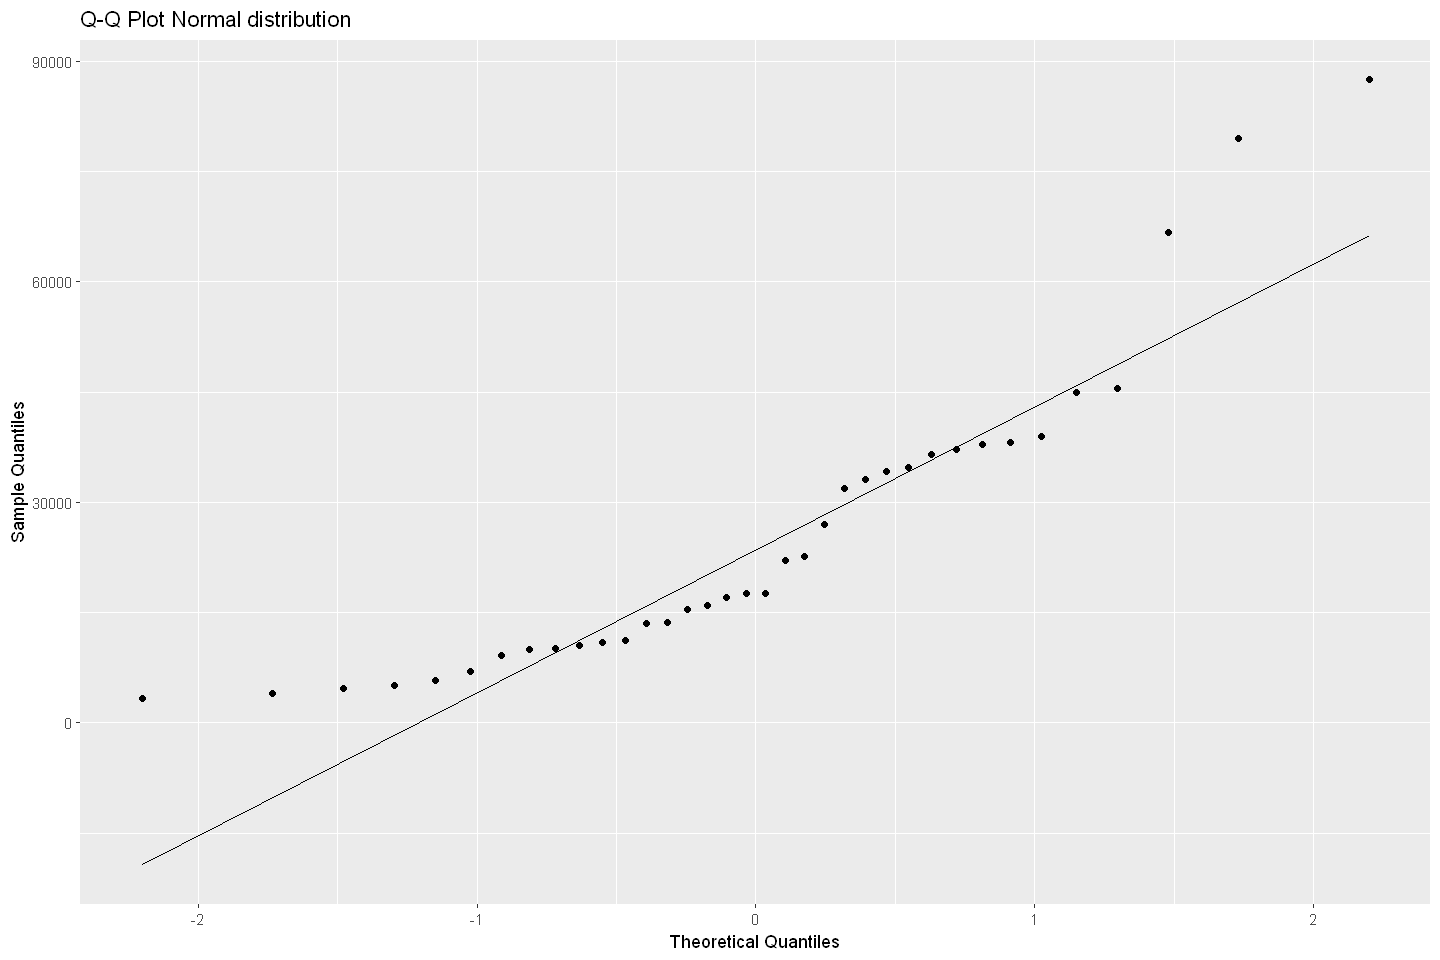

In [10]:
p1 <- ggplot(data, aes(sample = GDP)) +
  stat_qq(distribution = qnorm) +
  stat_qq_line(distribution = qnorm) +
  labs(title = "Q-Q Plot Normal distribution",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles")

print(p1)

Test Jarque-Bera je statistický test normality. 

Nulová hypotéza testu Jarque-Bera je, že data pocházejí z normálního rozdělení. Zamítáme nulovou hypotézu ve prospěch alternativní hypotézy, protože hodnota p (0.0006412) menší než 0.05. Máme dostatečné důkazy k zamítnutí nulové hypotézy a přijetí alternativní hypotézy, že data nejsou normálně distribuovaná.


In [11]:
jarque.test(data$GDP)


	Jarque-Bera Normality Test

data:  data$GDP
JB = 14.621, p-value = 0.0006685
alternative hypothesis: greater


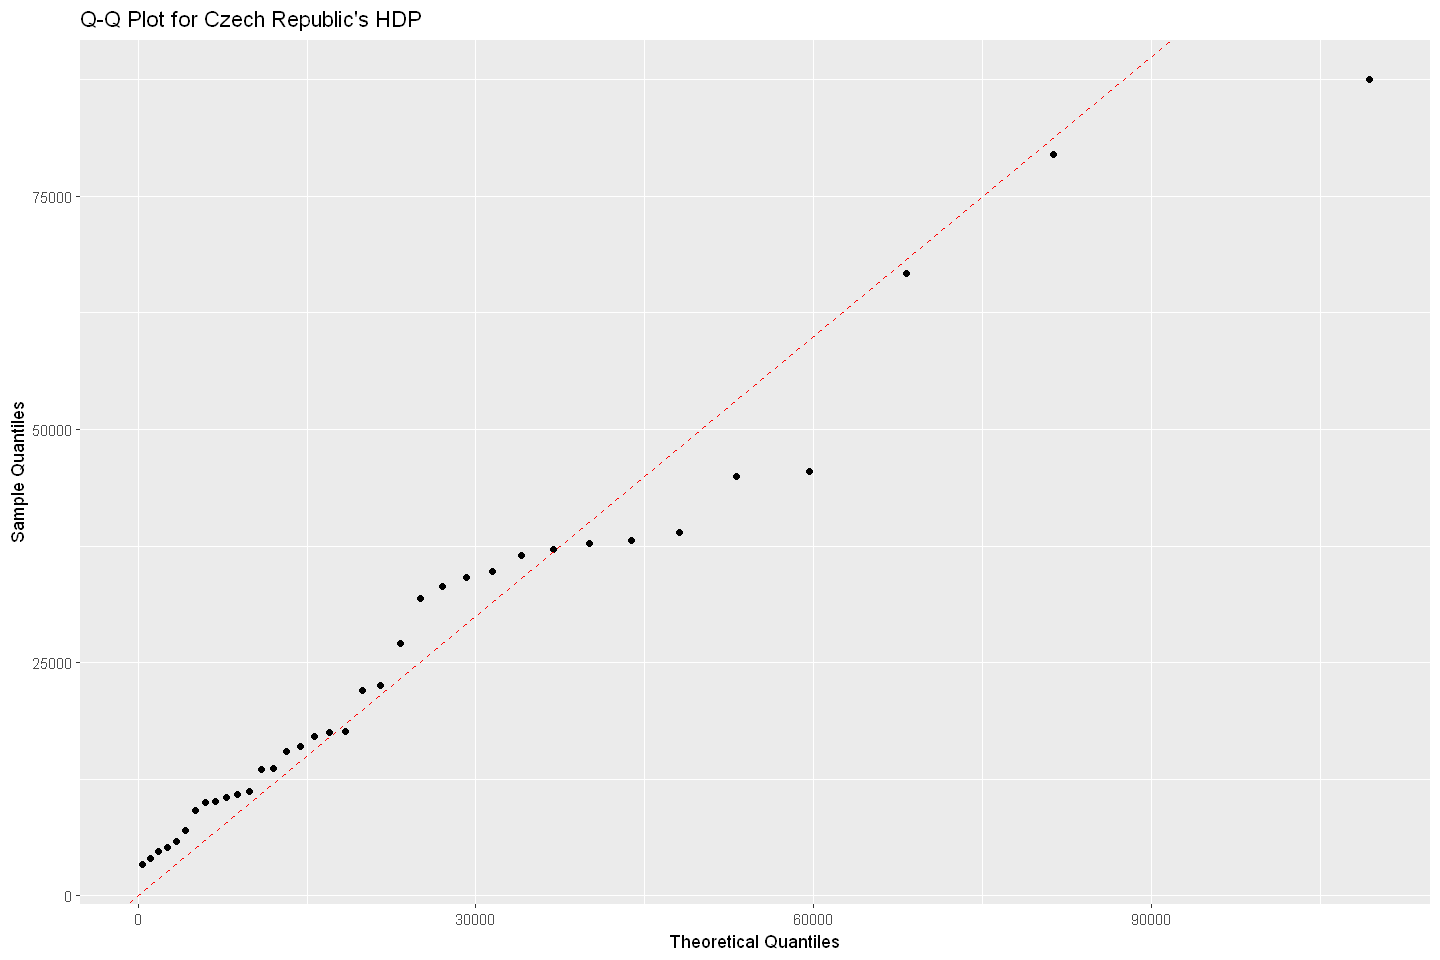

In [12]:
xp_quantiles <- qexp(seq(0.01, 0.99, by = 0.01), rate = 1/mean(data$GDP))

p2 <- ggplot(data, aes(sample = GDP)) +
  stat_qq(distribution = qexp, dparams = list(rate = 1/mean(data$GDP))) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "Q-Q Plot for Czech Republic's HDP",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles")

print(p2)

### Diskuse o vlivu na HDP
Jeden z možných způsobu jak vypočítat HDP je pomocí této formule:

$GDP = Consumption+Government Spending+Investment+Net Export$ [source link](https://www.investopedia.com/terms/g/gdp.asp)

* Spotřeba (Consumption) se týká výdajů na soukromou spotřebu nebo spotřebitelských výdajů. Spotřebitelé utrácejí peníze za zboží a služby, například za nákup potravin nebo za stříhání vlasů
* Vládní výdaje (Government Spending) představují výdaje na vládní spotřebu a hrubé investice. Vlády utrácejí peníze za vybavení, infrastrukturu a mzdy. Vládní výdaje mohou nabýt na významu ve srovnání s ostatními složkami HDP dané země, když spotřebitelské výdaje i podnikatelské investice prudce klesají. (K tomu může dojít například v důsledku recese.)
* Investice se týkají soukromých domácích investic nebo kapitálových výdajů. Podniky vynakládají peníze na investice do svých podnikatelských aktivit. Podnik může například nakoupit strojní zařízení. Podnikatelské investice jsou rozhodující složkou HDP, protože zvyšují výrobní kapacitu ekonomiky a zvyšují úroveň zaměstnanosti.
* Vzorec pro čistý vývoz odečte celkový vývoz od celkového dovozu (NX = vývoz - dovoz). Zboží a služby, které ekonomika vyrábí a vyváží do jiných zemí, snížené o dovoz, který nakupují domácí spotřebitelé, představují čistý vývoz země. Do tohoto výpočtu jsou zahrnuty všechny výdaje společností sídlících v dané zemi, i když se jedná o zahraniční společnosti.
* Klimatické podmínky, geografická poloha a infrastruktura mohou mít vliv na ekonomický růst a produktivitu.
* Hospodářská politika vlády

## Úloha 2:

[Consumption and government spending dataset](https://ec.europa.eu/eurostat/databrowser/view/gov_10a_main__custom_11325103/default/table?lang=en) 

* Použijeme pro ziskání vládních výdajů ([TE]Total general government expenditure), spotřeby ([P3]Final consumption expenditure). Jako unit of measure budeme mít Million euro a sektor [S13] General government. Tato kategorie zahrnuje celkové výdaje veřejného sektoru včetně centrální vlády, státních vlád, místních samospráv a fondů sociálního zabezpečení

* Total general government expenditure: kategorie zahrnuje celkové výdaje vlády, včetně výdajů na vládní spotřebu (například na veřejné služby, mzdy zaměstnanců ve veřejném sektoru) a hrubé investice (například investice do infrastruktury, vzdělávání, zdravotnictví apod.)
* Final consumption expenditure: Jedná se o konečné spotřebitelské výdaje, které zahrnují výdaje domácností na zboží a služby pro osobní spotřebu

[Net export dataset](https://ec.europa.eu/eurostat/databrowser/view/ds-018995__custom_11325190/default/table?lang=en)
* Použijeme pro ziskání Netexport. Z nějakého důvodu tento dataset nelze stahnout pomocí příkazu get_eurostat, musel jsem to stahnout ručně s hodnotami IMPORT a EXPORT, kde jednotky jsou uvedené v euro, následně výpočítat EXPORT - IMPORT a převést na milliony euro, abychom měli konzistentní jednotky

Jako kategorický příznak použijeme, zdá se v této zemí platí eurem nebo ne.

Tedy budeme mít čtyři údaje:
1) Vladní výdaje
2) Spotřeba
3) Netexport
4) Zdá se platí eurem


### Vládní výdaje

In [13]:
government_spending <- get_eurostat(id = "gov_10a_main")

Table gov_10a_main cached at C:\Users\User\AppData\Local\Temp\RtmpIN0r1V/eurostat/bbb9d3be9550294f0158a3198f9a82e3.rds



In [14]:
government_spending <- government_spending %>%
  filter(na_item == "TE" & sector == "S13" & unit == "MIO_EUR" & TIME_PERIOD == as.Date("2012-01-01"))

In [15]:
government_spending$freq <- NULL 
government_spending$unit <- NULL
government_spending$sector <- NULL
government_spending$na_item <- NULL
government_spending$TIME_PERIOD <- NULL 
government_spending <- subset(government_spending, !(geo %in% c("EA19", "EA20", "EU15", "EU27_2020", "EU28")))
government_spending <- government_spending %>% rename(spending = values)

In [16]:
merged_data <- merge(data, government_spending, by = "geo", all.x = TRUE)
merged_data

geo,GDP,spending
<chr>,<dbl>,<dbl>
AL,3300,NA
AT,37820,163191.9
BE,34770,218102.1
BG,5780,14476.0
CH,66780,174563.9
CY,22570,8205.4
CZ,15470,72636.1
DE,34130,1233138.0
DK,45530,147540.5


### Spotřeba

In [17]:
consumption <- get_eurostat(id = "gov_10a_main")
consumption <- consumption %>%
  filter(na_item == "P3" & sector == "S13" & unit == "MIO_EUR" & TIME_PERIOD == as.Date("2012-01-01"))

Dataset query already saved in cache_list.json...

Reading cache file C:\Users\User\AppData\Local\Temp\RtmpIN0r1V/eurostat/bbb9d3be9550294f0158a3198f9a82e3.rds

Table  gov_10a_main  read from cache file:  C:\Users\User\AppData\Local\Temp\RtmpIN0r1V/eurostat/bbb9d3be9550294f0158a3198f9a82e3.rds



In [18]:
consumption$freq <- NULL 
consumption$unit <- NULL
consumption$sector <- NULL
consumption$na_item <- NULL
consumption$TIME_PERIOD <- NULL 
consumption <- subset(consumption, !(geo %in% c("EA19", "EA20", "EU15", "EU27_2020", "EU28")))
consumption <- consumption %>% rename(consumption = values)

In [19]:
merged_data <- merge(merged_data, consumption, by = "geo", all.x = TRUE)
merged_data

geo,GDP,spending,consumption
<chr>,<dbl>,<dbl>,<dbl>
AL,3300,NA,NA
AT,37820,163191.9,63286.7
BE,34770,218102.1,93853.4
BG,5780,14476.0,6672.6
CH,66780,174563.9,60423.2
CY,22570,8205.4,3657.6
CZ,15470,72636.1,31627.4
DE,34130,1233138.0,529210.0
DK,45530,147540.5,67390.5


### Net export

Z nějakého důvodu tento dataset nejde stahnout, ačkoliv ID je korektní. Musím to udělat ručně.

In [20]:
net_export <- get_eurostat(id = "ds-018995")

ERROR: Error in get_eurostat(id = "ds-018995"): get_eurostat_raw fails with the id ds-018995


In [21]:
srch <- search_eurostat(pattern='ds-018995')
srch

title,code,type,last.update.of.data,last.table.structure.change,data.start,data.end,values,hierarchy
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>


In [22]:
iso_codes <- c("AT", "BE", "BG", "CY", "CZ", "DE", "DK", "EE", "ES", "FI", "FR", "UK", "GR", "HR", "HU", "IE", "IT", "LT", "LU", "LV", 
               "MT", "NL", "PL", "PT", "RO", "SE", "SI", "SK")
numbers <- c(-9263888500, 5301097222, -4689011720, -4324366075, 12164454752, 191672383879, 11882664818, -1555878385, -32758768516,
             -2639245886, -82274908458, -173553722109, -20488303047, -6585745311, 6533296007, 37616936666, 9889611000, -1831640682, 
             -6569582335, -2425268983, -1827085904, 53274410334, -10651734804, -11161067261, -9624697962, 6155940741, 99579822, 
             2540358306)
numbers <- numbers / 1000000
netexport <- data.frame(geo = iso_codes, netexport = numbers)

Můžeme vidět, že spoustu hodnot nám chybí a nejsou v datasetech od eurostatu. Pokusím se najít hodnoty z externích zdrojů.

In [23]:
merged_data <- merge(merged_data, netexport, by = "geo", all.x = TRUE)
merged_data

geo,GDP,spending,consumption,netexport
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AL,3300,NA,NA,NA
AT,37820,163191.9,63286.7,-9263.88850
BE,34770,218102.1,93853.4,5301.09722
BG,5780,14476.0,6672.6,-4689.01172
CH,66780,174563.9,60423.2,NA
CY,22570,8205.4,3657.6,-4324.36607
CZ,15470,72636.1,31627.4,12164.45475
DE,34130,1233138.0,529210.0,191672.38388
DK,45530,147540.5,67390.5,11882.66482


In [24]:
merged_data[1,"spending"] <- 2684.019 # albania https://ndiqparate.al/?p=9276&lang=en
merged_data[23,"spending"]<- 2963.1 # montenegro https://nso.gov.mt/wp-content/uploads/News2014_019.pdf
merged_data[24,"spending"]<- 2770 # macedonia source chat gpt, nenasel jsem nikde jinde
merged_data[31, "spending"] <-6127.12 # serbia https://tradingeconomics.com/serbia/government-spending
merged_data[35, "spending"] <- 16960.78 # turkey https://tradingeconomics.com/turkey/government-spending
merged_data[36, "spending"] <- 814962 # uk https://assets.publishing.service.gov.uk/media/5a7ad0afed915d71db8b2aa7/National_statistics_release_October_2012.pdf

merged_data[1,"consumption"] <- 7470 #https://www.macrotrends.net/global-metrics/countries/ALB/albania/consumer-spending
merged_data[23,"consumption"] <- 2630 # https://www.macrotrends.net/global-metrics/countries/MNE/montenegro/consumer-spending
merged_data[24, "consumption"] <- 5601.52 # https://www.macrotrends.net/global-metrics/countries/MKD/north-macedonia/consumer-spending
merged_data[31, "consumption"] <- 25436.381 # https://www.macrotrends.net/global-metrics/countries/SRB/serbia/consumer-spending
merged_data[35, "consumption"] <- 424018 # https://www.macrotrends.net/global-metrics/countries/TUR/turkey/consumer-spending
merged_data[36, "consumption"] <- 143604 # https://www.ons.gov.uk/economy/nationalaccounts/satelliteaccounts/timeseries/abjr/pn2

merged_data[1,"netexport"] <- -2265.7 #https://wits.worldbank.org/CountryProfile/en/Country/ALB/Year/2012/Summary
merged_data[5,"netexport"] <- 13383.8 #https://wits.worldbank.org/CountryProfile/en/Country/CHE/Year/2012/Summarytext
merged_data[11, "netexport"] <- -27353 #https://wits.worldbank.org/CountryProfile/en/Country/GRC/Year/2012/Summarytext
merged_data[18, "netexport"] <- 291 #https://www.macrotrends.net/global-metrics/countries/ISL/iceland/exports
merged_data[23,"netexport"] <- -1452.21 # https://wits.worldbank.org/CountryProfile/en/Country/MNT/Year/2012/Summarytext
merged_data[24, "netexport"] <- -896 # https://webgate.ec.europa.eu/isdb_results/factsheets/country/details_north-macedonia_en.pdf
merged_data[27, "netexport"] <- 57302.18 #https://wits.worldbank.org/CountryProfile/en/Country/NOR/Year/2012/Summarytext
merged_data[31, "netexport"] <- 12070 #https://www.macrotrends.net/global-metrics/countries/SRB/serbia/exports
merged_data[35, "netexport"] <- 166840 #https://www.macrotrends.net/global-metrics/countries/TUR/turkey/exports

In [25]:
merged_data

geo,GDP,spending,consumption,netexport
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AL,3300,2684.019,7470.00,-2265.70000
AT,37820,163191.900,63286.70,-9263.88850
BE,34770,218102.100,93853.40,5301.09722
BG,5780,14476.000,6672.60,-4689.01172
CH,66780,174563.900,60423.20,13383.80000
CY,22570,8205.400,3657.60,-4324.36607
CZ,15470,72636.100,31627.40,12164.45475
DE,34130,1233138.000,529210.00,191672.38388
DK,45530,147540.500,67390.50,11882.66482


### Kategorický příznak

In [26]:
countries <- c("AL", "AT", "BE", "BG", "CH", "CY", "CZ", "DE", "DK", "EE", "EL", 
               "ES", "FI", "FR", "HR", "HU", "IE", "IS", "IT", "LT", "LU", "LV", 
               "ME", "MK", "MT", "NL", "NO", "PL", "PT", "RO", "RS", "SE", "SI", 
               "SK", "TR", "UK")

In [27]:
uses_euro <- function(country_code) {
  euro_countries <- c("AT", "BE", "CY", "EE", "FI", "FR", "DE", "GR", "IE", 
                      "IT", "LV", "LT", "LU", "MT", "NL", "PT", "SK", "SI", 
                      "ES", "ME")
  if (country_code %in% euro_countries) {
    return("Yes")
  } else {
    return("No")
  }
}
euro_usage <- sapply(countries, uses_euro)
euro_data <- data.frame(geo = countries, Euro_Usage = euro_usage)

Nyní máme 4 regresory a můžeme přístoupit k dalším částem

In [28]:
merged_data <- merge(merged_data, euro_data, by = "geo", all.x = TRUE)
merged_data

geo,GDP,spending,consumption,netexport,Euro_Usage
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AL,3300,2684.019,7470.00,-2265.70000,No
AT,37820,163191.900,63286.70,-9263.88850,Yes
BE,34770,218102.100,93853.40,5301.09722,Yes
BG,5780,14476.000,6672.60,-4689.01172,No
CH,66780,174563.900,60423.20,13383.80000,No
CY,22570,8205.400,3657.60,-4324.36607,Yes
CZ,15470,72636.100,31627.40,12164.45475,No
DE,34130,1233138.000,529210.00,191672.38388,Yes
DK,45530,147540.500,67390.50,11882.66482,No


In [29]:
data <- merged_data

### Vlastnosti zvolených ukazatelů číselně i graficky

Rozložení hodnot spotřeby ukazuje, že většina zemí nebo regionů má spotřebu koncentrovanou v nižším rozsahu, zatímco několik zemí nebo regionů má velmi vysoké výdaje na konečnou spotřebu, což zvyšuje průměr. Tento závěr je podpořen vyšším průměrem ve srovnání s mediánem a relativně vysokými hodnotami třetího kvartilu a maxima.

In [30]:
cat("Spotřeba:", "\n")
summary(data$consumption)

Spotřeba: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1452    7203   31243   88308   85080  529210 

Podobně jako u spotřeby, toto rozložení je také pozitivně (vpravo) šikmé, což naznačuje přítomnost několika velmi vysokých hodnot, které ovlivňují průměr.

In [31]:
cat("Vládní výdaje:", "\n")
summary(data$spending)

Vládní výdaje: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2684   11210   61507  191258  172444 1233138 

Rozložení hodnot čistého exportu ukazuje, že většina zemí nebo regionů má hodnoty blíže k nule, s několika extrémními hodnotami na obou stranách spektra. Přítomnost negativních hodnot znamená, že tyto země více dováží než vyváží (čistý dovoz), zatímco pozitivní hodnoty znamenají, že více vyváží než dováží (čistý vývoz)

In [32]:
cat("Net Export:", "\n")
summary(data$netexport)

Net Export: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-173554   -6574   -1504    5370   10388  191672 

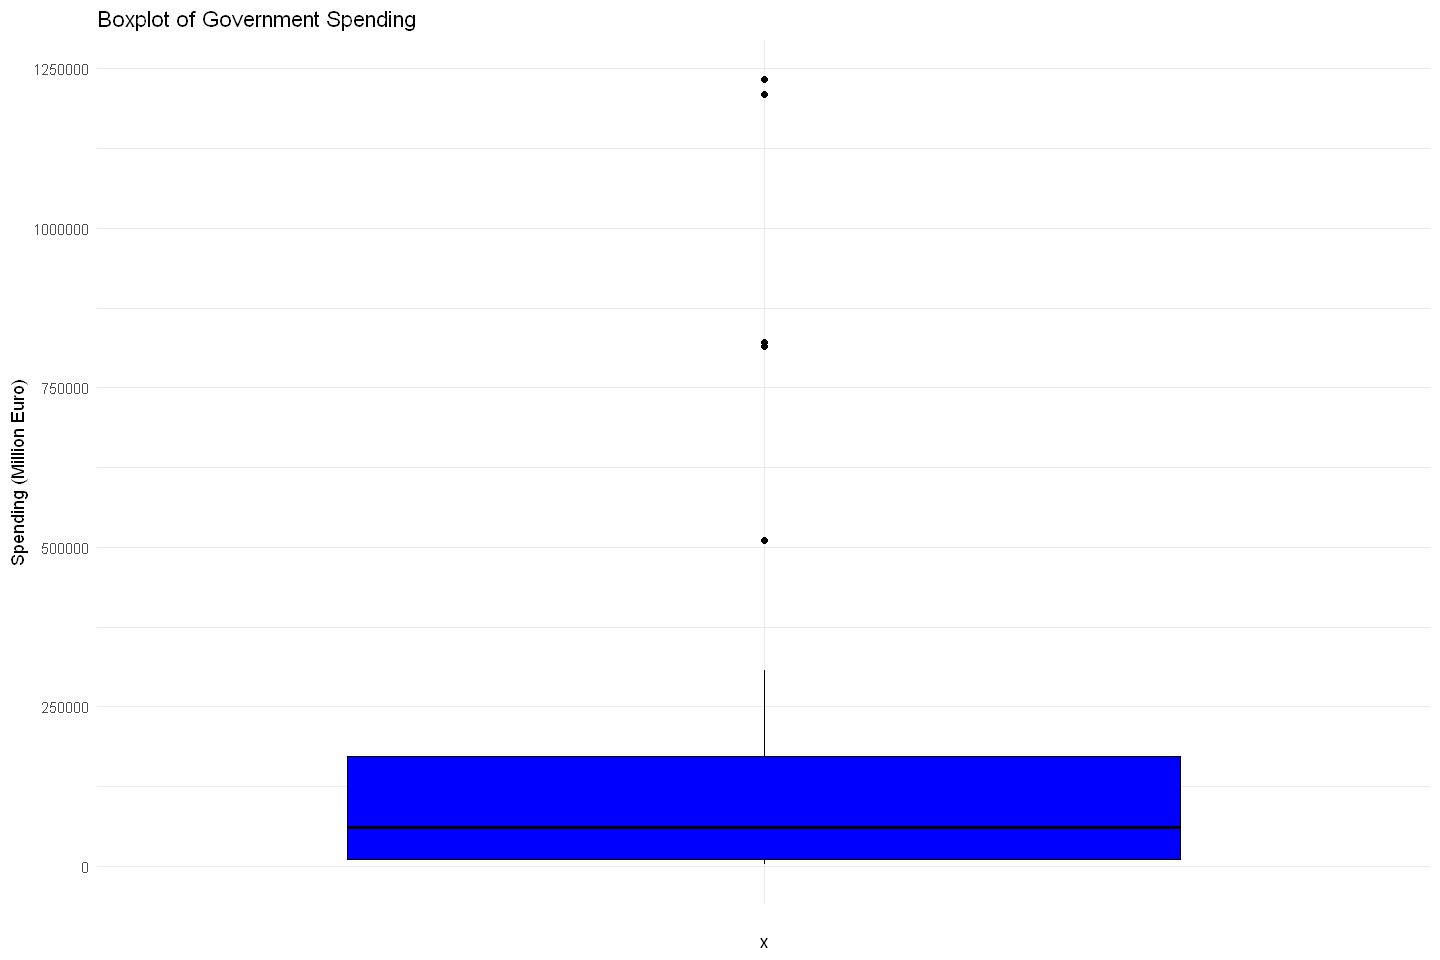

In [33]:
ggplot(data, aes(x="", y=spending)) + 
  geom_boxplot(fill="blue", color="black") + 
  theme_minimal() + 
  labs(title="Boxplot of Government Spending", y="Spending (Million Euro)")

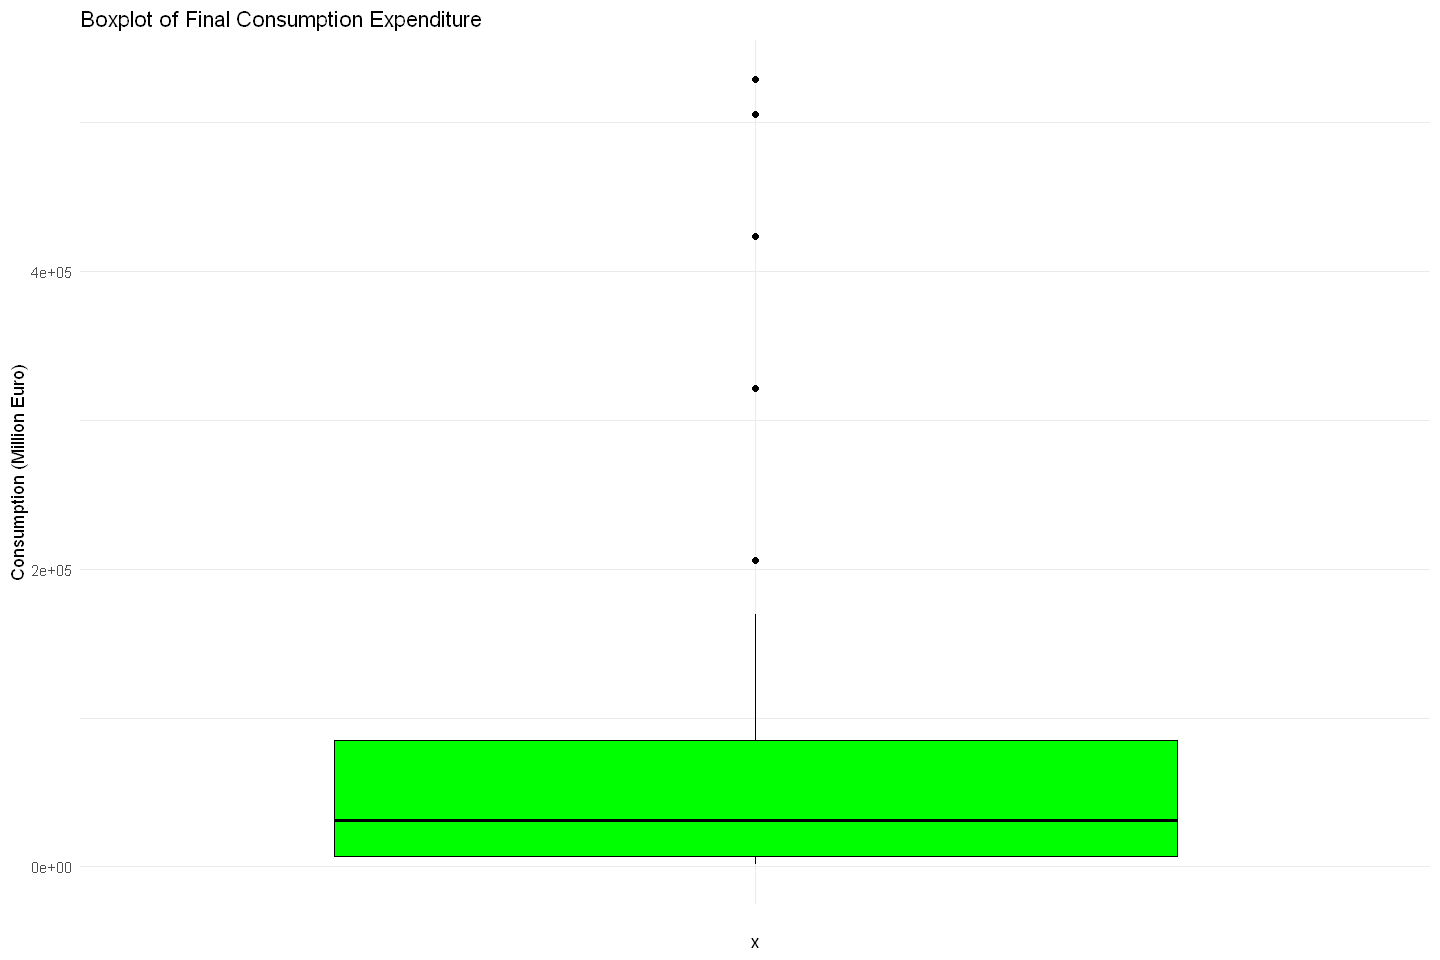

In [34]:
ggplot(data, aes(x="", y=consumption)) + 
  geom_boxplot(fill="green", color="black") + 
  theme_minimal() + 
  labs(title="Boxplot of Final Consumption Expenditure", y="Consumption (Million Euro)")

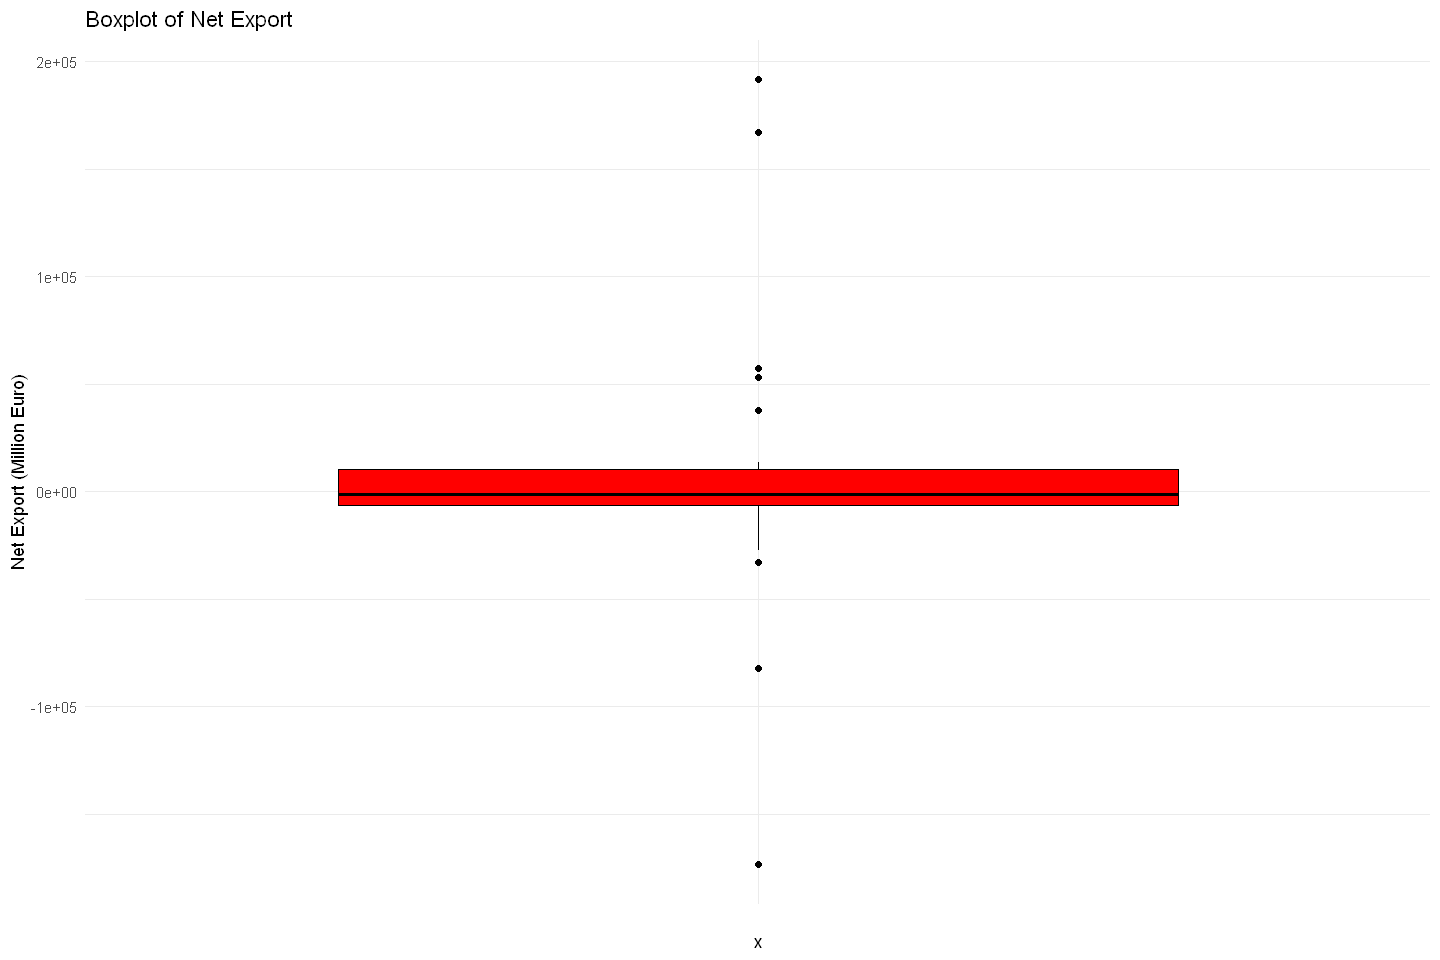

In [35]:
ggplot(data, aes(x="", y=netexport)) + 
  geom_boxplot(fill="red", color="black") + 
  theme_minimal() + 
  labs(title="Boxplot of Net Export", y="Net Export (Million Euro)")

Vidíme, že počty zemí, ve kterých se platí eurem a ve kterých se neplatí eurem je podobný

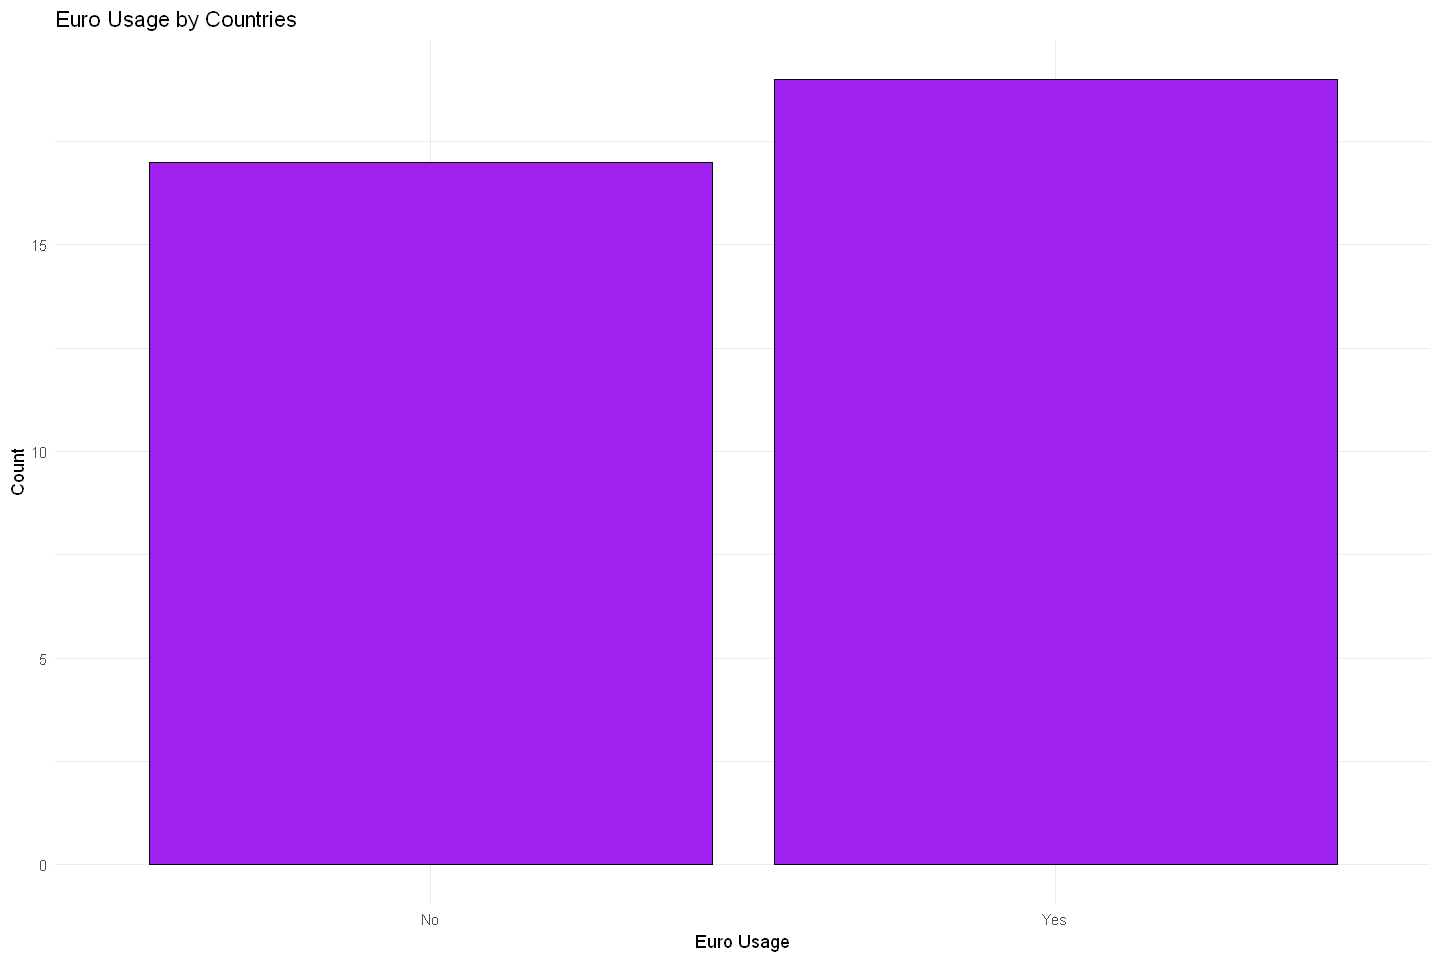

In [36]:
ggplot(data, aes(x=Euro_Usage)) + 
  geom_bar(fill="purple", color="black") + 
  theme_minimal() + 
  labs(title="Euro Usage by Countries", x="Euro Usage", y="Count")

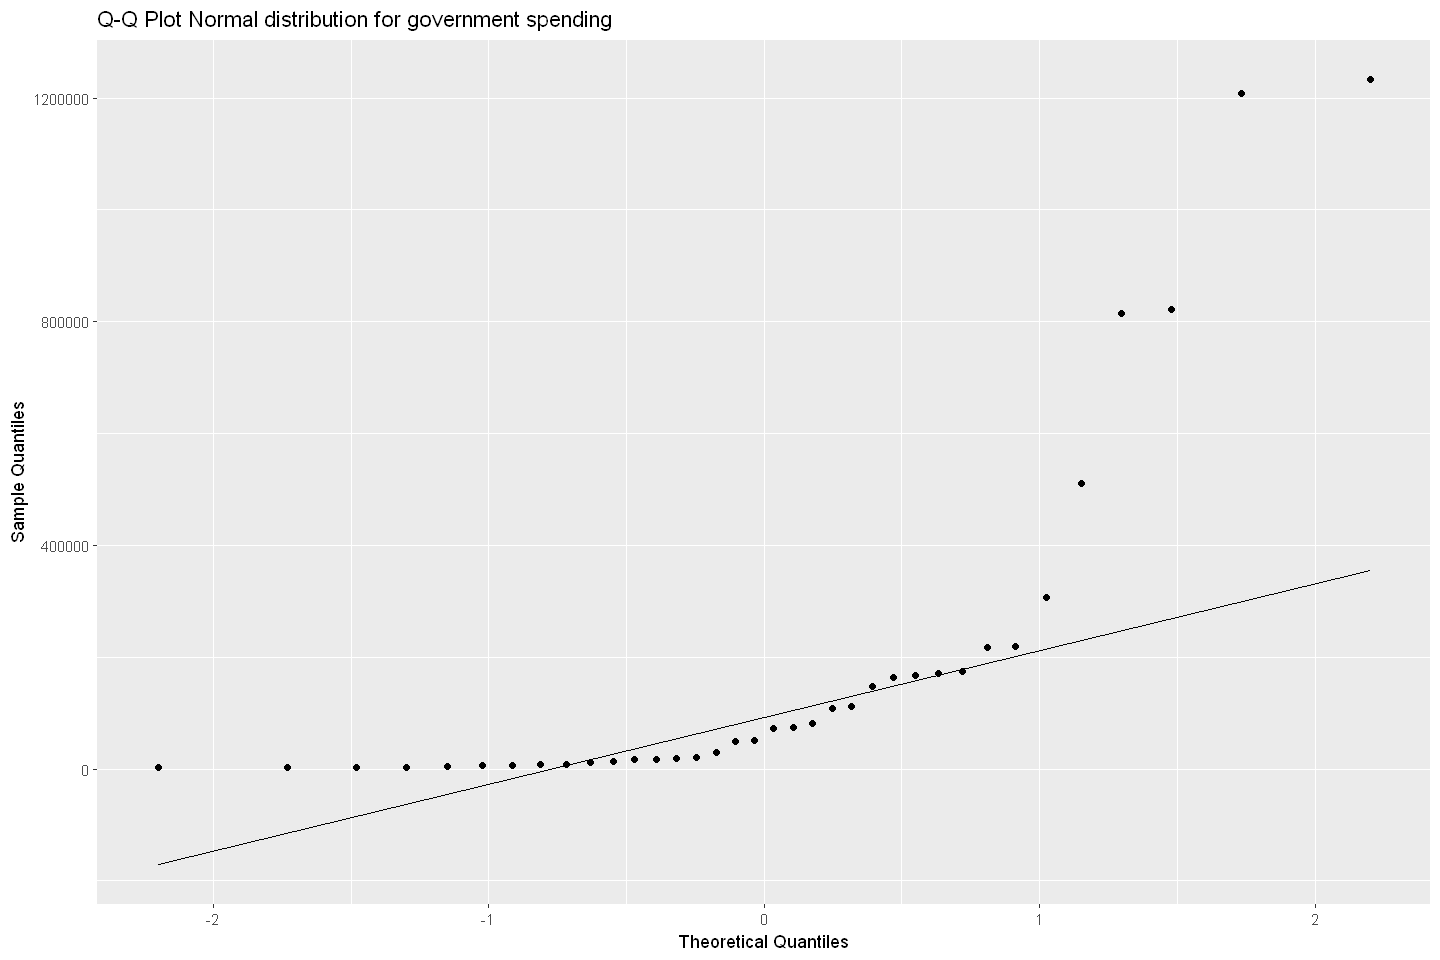

In [37]:
p1 <- ggplot(data, aes(sample = spending)) +
  stat_qq(distribution = qnorm) +
  stat_qq_line(distribution = qnorm) +
  labs(title = "Q-Q Plot Normal distribution for government spending",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles")

print(p1)

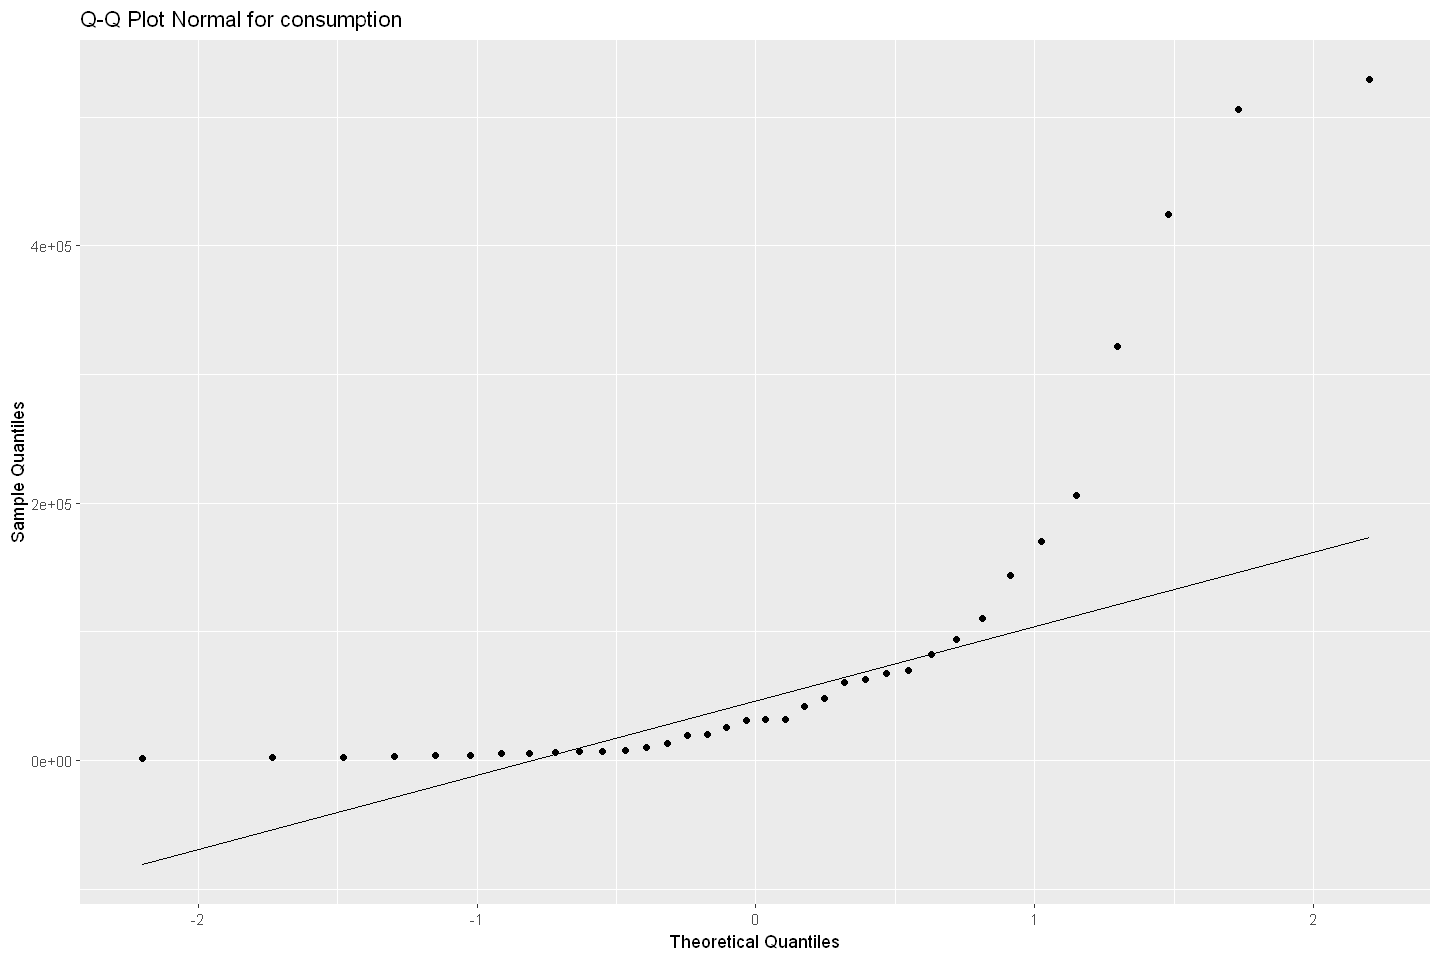

In [38]:
p1 <- ggplot(data, aes(sample = consumption)) +
  stat_qq(distribution = qnorm) +
  stat_qq_line(distribution = qnorm) +
  labs(title = "Q-Q Plot Normal for consumption",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles")

print(p1)

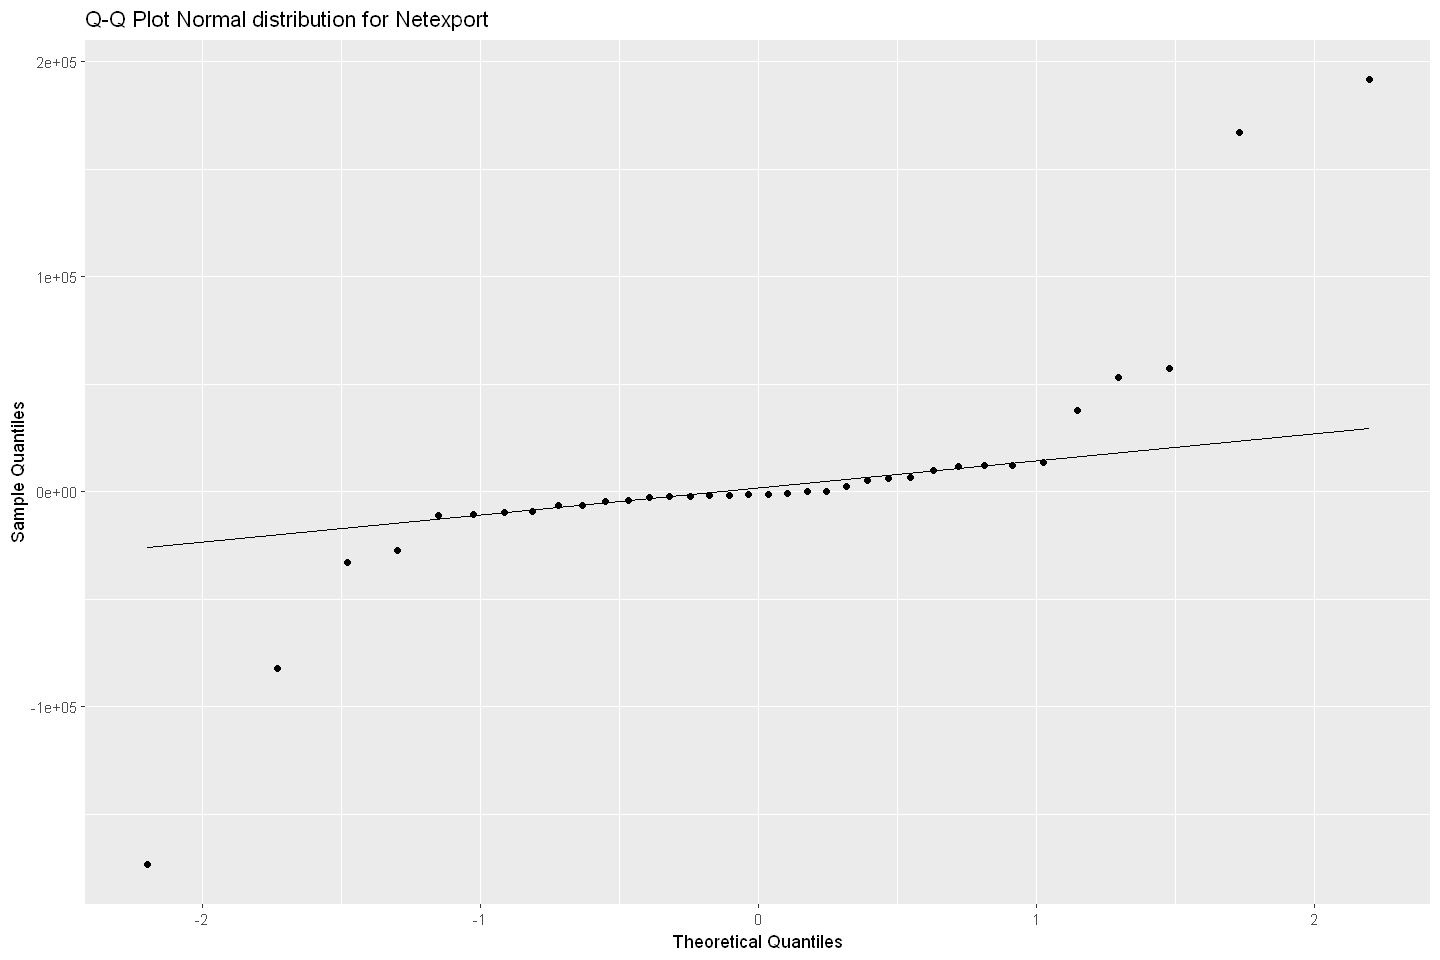

In [39]:
p1 <- ggplot(data, aes(sample = netexport)) +
  stat_qq(distribution = qnorm) +
  stat_qq_line(distribution = qnorm) +
  labs(title = "Q-Q Plot Normal distribution for Netexport",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles")

print(p1)

### Závislosti mezi regresory

Spearmanův korelační koeficient je vhodný pro situace, kdy data nesplňují předpoklad normality.

* Koeficient mezi spending a consumption je ~0.8893: Hodnota blízká 1 naznačuje, že obě proměnné se pohybují ve stejném směru, což znamená, že když rostou výdaje, roste i spotřeba, a naopak. V obecném smyslu, pokud roste ekonomika a lidé mají k dispozici více financí, mohou nakupovat více zboží a služeb
* Koeficient mezi spending a netexport je ~0.0190: Mezi těmito dvěma proměnnými není žádný vztah nebo vzájemná závislost.
* Koeficient mezi consumption a netexport je ~0.173: Tento koeficient naznačuje mírnou pozitivní korelaci mezi spotřebou a čistým exportem.

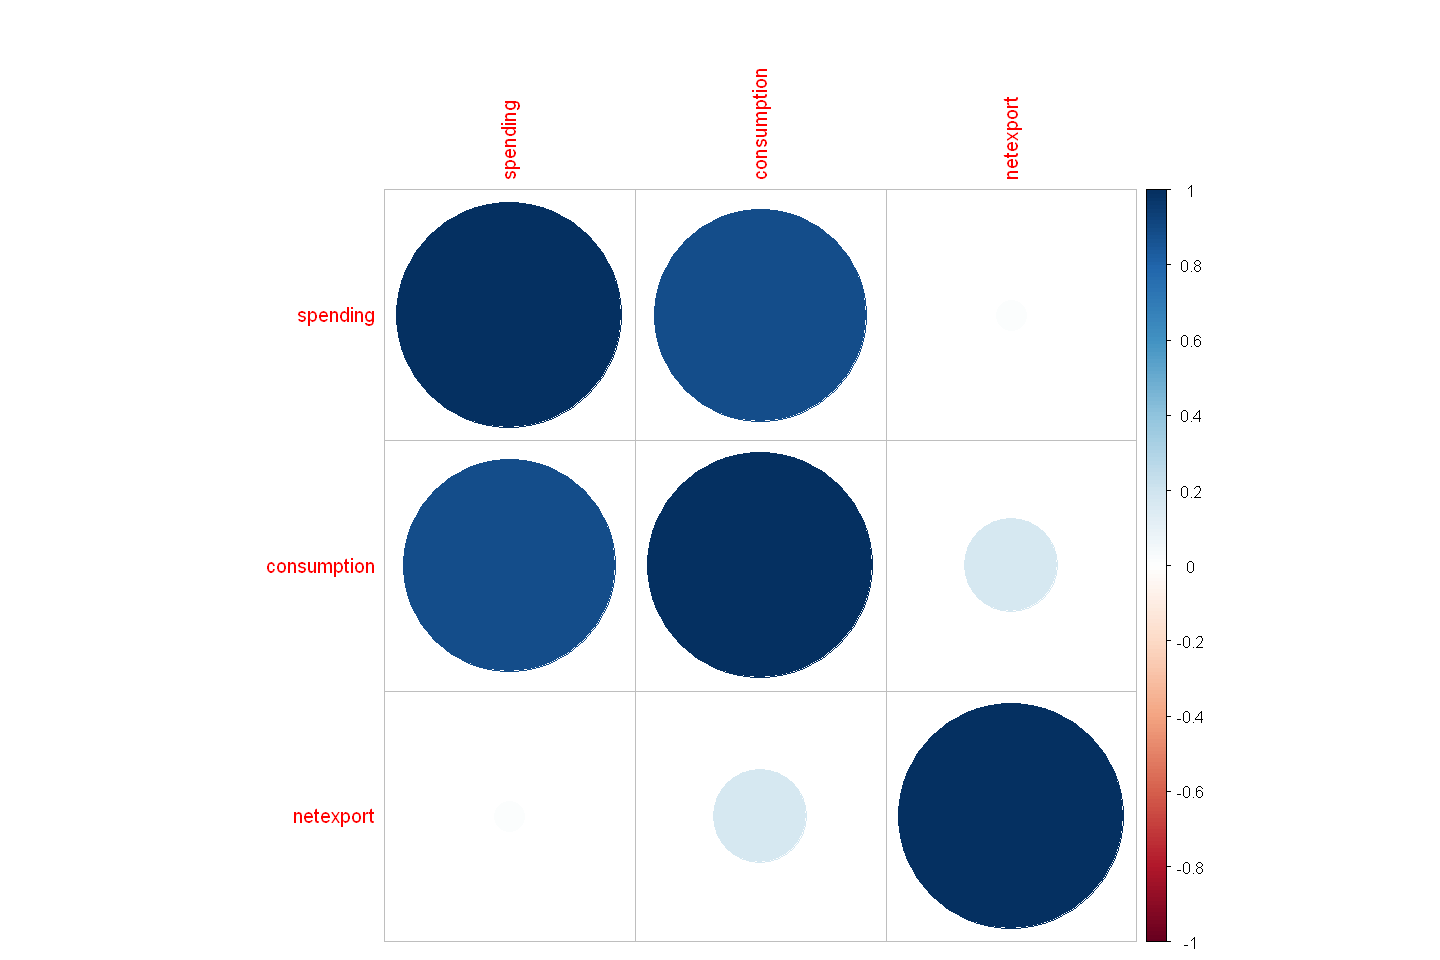

In [40]:
spearman_cor_matrix <- cor(data[c("spending", "consumption", "netexport")], method="spearman")
corrplot(spearman_cor_matrix, method="circle", mar=c(0,0,1,0))

Kruskal-Wallis je neparametrický test používaný k určení, zda existuje statisticky významný rozdíl mezi mediány dvou nebo více skupin. Testuje stejnou hypotézu jako analýza rozptylu, ale je vhodný pro data, která nesplňují předpoklady normálního rozdělení.

* **Spending by Euro_Usage**: P-hodnota je vyšší než běžně používaná hladina významnosti 0.05, což naznačuje, že nemáme dostatečné důkazy na odmítnutí nulové hypotézy. To znamená, že nedošlo k statisticky významnému rozdílu ve výdajích mezi skupinami s a bez používání eura.
* **Consumption by Euro_Usage**: Opět je p-hodnota vyšší než hladina významnosti 0.05, což naznačuje, že nemáme dostatečné důkazy na odmítnutí nulové hypotézy. To znamená, že nedošlo k statisticky významnému rozdílu v spotřebě mezi skupinami s a bez používání eura.
* **Netexport by Euro_Usage**: Stejně jako v předchozích případech, p-hodnota je vyšší než hladina významnosti 0.05, což naznačuje, že nemáme dostatečné důkazy na odmítnutí nulové hypotézy. To znamená, že nedošlo k statisticky významnému rozdílu v čistém exportu mezi skupinami s a bez používání eura.

In [41]:
kw_spending <- kruskal.test(spending ~ Euro_Usage, data=data)
kw_consumption <- kruskal.test(consumption ~ Euro_Usage, data=data)
kw_netexport <- kruskal.test(netexport ~ Euro_Usage, data=data)

kw_spending
kw_consumption
kw_netexport


	Kruskal-Wallis rank sum test

data:  spending by Euro_Usage
Kruskal-Wallis chi-squared = 0.34365, df = 1, p-value = 0.5577



	Kruskal-Wallis rank sum test

data:  consumption by Euro_Usage
Kruskal-Wallis chi-squared = 0.1107, df = 1, p-value = 0.7393



	Kruskal-Wallis rank sum test

data:  netexport by Euro_Usage
Kruskal-Wallis chi-squared = 0.34365, df = 1, p-value = 0.5577


### Vztah k HDP

Nyní přidáme do korelační matice naši vysvětlenou proměnnou a podíváme se na její vztah k vybraným regresorům.

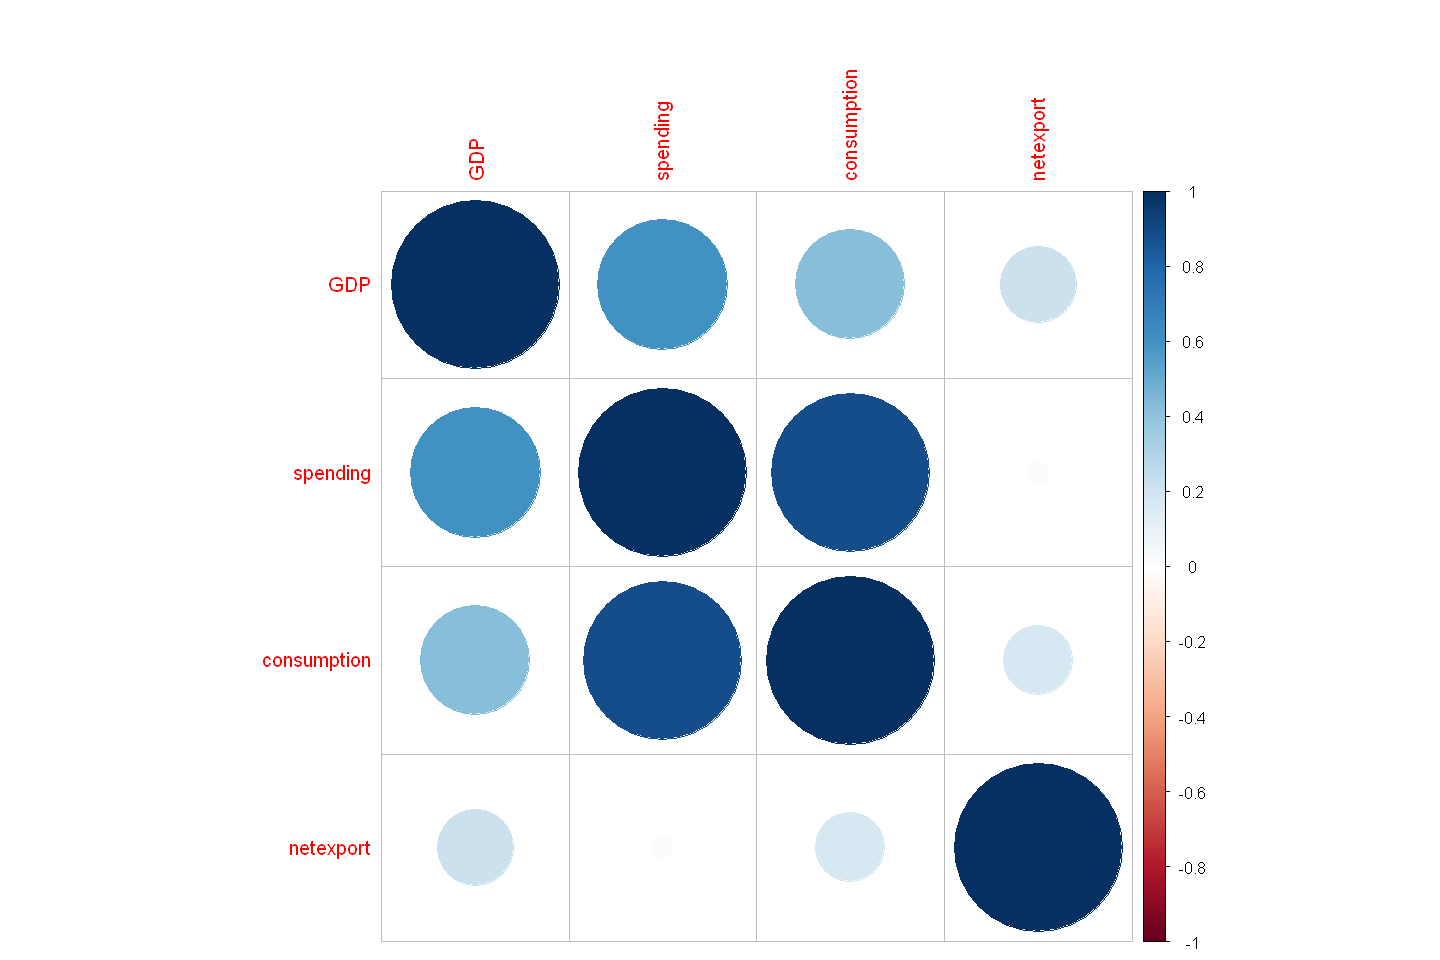

In [42]:
spearman_cor_matrix <- cor(data[c("GDP", "spending", "consumption", "netexport")], method="spearman")
corrplot(spearman_cor_matrix, method="circle", mar=c(0,0,1,0))

In [43]:
print(spearman_cor_matrix)

                  GDP   spending consumption  netexport
GDP         1.0000000 0.60360360   0.4262548 0.21029601
spending    0.6036036 1.00000000   0.8893179 0.01904762
consumption 0.4262548 0.88931789   1.0000000 0.17323037
netexport   0.2102960 0.01904762   0.1732304 1.00000000


1. **Výdaje (spending)**: Korelační koeficient mezi HDP a výdaji je 0,6036036, což naznačuje středně silnou pozitivní korelaci. To znamená, že když se výdaje zvyšují, HDP má tendenci také růst. Vztah mezi těmito dvěma proměnnými je poměrně silný, což naznačuje, že zvýšení výdajů může být spojeno s růstem HDP.

2. **Spotřeba (consumption)**: Korelační koeficient mezi HDP a spotřebou je 0,4262548, což naznačuje středně silnou pozitivní korelaci. To znamená, že když se spotřeba zvyšuje, HDP má tendenci také růst. Tento vztah je méně silný než u výdajů, ale stále významný, což naznačuje, že zvýšení spotřeby může být spojeno s růstem HDP.

3. **Čistý export (netexport)**: Korelační koeficient mezi HDP a čistým exportem je 0,2102960, což naznačuje slabou pozitivní korelaci. To znamená, že když se čistý export zvyšuje, HDP má tendenci také růst, ale tento vztah není silný. Zvýšení čistého exportu může být spojeno s růstem HDP, ale vliv je relativně malý ve srovnání s výdaji a spotřebou.

Pro zbývající kategorický regresor použijeme Kruskal-Wallis test.
- $H_0$: Mediány HDP jsou stejné pro obě skupiny (země používající euro a země nepoužívající euro).
- $H_A$: Mediány HDP se liší mezi skupinami.

In [44]:
kw_GDP <- kruskal.test(GDP ~ Euro_Usage, data=data)
kw_GDP


	Kruskal-Wallis rank sum test

data:  GDP by Euro_Usage
Kruskal-Wallis chi-squared = 2.1711, df = 1, p-value = 0.1406


===============================================================

Při obvyklé hladině významnosti 0.05 nemůžeme zamítnout nulovou hypotézu. Znamená to, že neexistuje statisticky významný důkaz, že by se mediány HDP mezi zeměmi, které používají euro, a těmi, které euro nepoužívají, lišily.

### Lineární regresní model

Pro začátek, bez ohledu na splnění předpokladů, vyzkoušíme několik různých modelů, které umožní ověřit závislost HDP na vybraných regresích.

In [45]:
model1 <- lm(GDP ~ spending + consumption + netexport + Euro_Usage, data=data)
summary(model1)


Call:
lm(formula = GDP ~ spending + consumption + netexport + Euro_Usage, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-19947 -13312  -6526   9673  63860 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.349e+04  5.391e+03   4.357 0.000134 ***
spending       4.217e-02  2.722e-02   1.549 0.131493    
consumption   -7.736e-02  6.653e-02  -1.163 0.253824    
netexport      9.870e-02  8.995e-02   1.097 0.280977    
Euro_UsageYes  6.047e+02  7.192e+03   0.084 0.933535    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20880 on 31 degrees of freedom
Multiple R-squared:  0.09172,	Adjusted R-squared:  -0.02548 
F-statistic: 0.7826 on 4 and 31 DF,  p-value: 0.5452


===============================================================

* Intercept: Estimate = 23500, p-value < 0.001
    * Pokud jsou všechny ostatní proměnné nulové, očekávaná hodnota HDP je 23500.
* spending (Výdaje): Estimate = 0.04217, p-value = 0.132
    * Při zvýšení výdajů o jednotku se očekává zvýšení HDP o 0.04217 jednotky, ale toto zvýšení není statisticky významné na hladině 0.05.
* consumption (Spotřeba): Estimate = -0.07735, p-value = 0.254
    * Nepodařilo se prokázat statisticky významný vztah mezi spotřebou a HDP na hladině významnosti 0.05.
* netexport (Export mínus import): Estimate = 0.09870, p-value = 0.281
    * Interpretace: Nepodařilo se prokázat statisticky významný vztah mezi netexportem a HDP na hladině významnosti 0.05.
* Euro_UsageYes (Používání eura): Estimate = 591.0, p-value = 0.935
    * Interpretace: Nepodařilo se prokázat statisticky významný rozdíl v HDP mezi zeměmi, které používají euro a těmi, které euro nepoužívají na hladině významnosti 0.05.

In [46]:
model_interaction1 <- lm(GDP ~ spending * consumption + netexport * Euro_Usage, data=data)
summary(model_interaction1)


Call:
lm(formula = GDP ~ spending * consumption + netexport * Euro_Usage, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-28857 -10417  -2374   9586  67096 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)              1.727e+04  5.543e+03   3.115  0.00412 **
spending                 1.993e-01  5.523e-02   3.607  0.00115 **
consumption             -2.595e-01  9.507e-02  -2.730  0.01065 * 
netexport                5.788e-01  1.884e-01   3.072  0.00459 **
Euro_UsageYes            1.828e+03  6.551e+03   0.279  0.78215   
spending:consumption    -1.675e-07  6.767e-08  -2.474  0.01944 * 
netexport:Euro_UsageYes -4.979e-01  1.990e-01  -2.502  0.01825 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18600 on 29 degrees of freedom
Multiple R-squared:  0.3259,	Adjusted R-squared:  0.1864 
F-statistic: 2.336 on 6 and 29 DF,  p-value: 0.05804


===============================================================
* Intercept: Estimate = 17270, p-value = 0.004
    * Pokud jsou všechny ostatní proměnné nulové, očekávaná hodnota HDP je 17270.
* spending (Výdaje): Estimate = 0.1993, p-value = 0.001
    * Při zvýšení výdajů o jednotku se očekává zvýšení HDP o 0.1993 jednotky, což je statisticky významné na hladině 0.05.
* consumption (Spotřeba): Estimate = -0.2596, p-value = 0.011
    * Pokud se spotřeba zvýší o jednotku, očekává se snížení HDP o 0.2596 jednotky, což je statisticky významné na hladině 0.05.
* netexport (Export mínus import): Estimate = 0.579, p-value = 0.005
    * Zvýšení netexportu o jednotku je spojeno se zvýšením HDP o 0.579 jednotky, což je statisticky významné na hladině 0.05.
* Euro_UsageYes (Používání eura): Estimate = 1816, p-value = 0.784
    * Nepodařilo se prokázat statisticky významný rozdíl v HDP mezi zeměmi, které používají euro a těmi, které euro nepoužívají na hladině významnosti 0.05.
* spending (Interakce výdajů a spotřeby): Estimate = -1.675e-07, p-value = 0.019
    * Existuje statisticky významná interakce mezi výdaji a spotřebou na hladině významnosti 0.05.
* netexport (Interakce netexportu a používání eura): Estimate = -0.498, p-value = 0.018
    * Existuje statisticky významná interakce mezi netexportem a používáním eura na hladině významnosti 0.05.


In [47]:
model_interaction2 <- lm(GDP ~ spending * netexport + consumption * Euro_Usage, data=data)
summary(model_interaction2)


Call:
lm(formula = GDP ~ spending * netexport + consumption * Euro_Usage, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-18685 -12207  -7010   9660  66435 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)                1.845e+04  6.158e+03   2.995  0.00556 **
spending                   1.487e-01  4.547e-02   3.271  0.00277 **
netexport                  6.857e-01  2.549e-01   2.690  0.01172 * 
consumption               -2.764e-01  1.140e-01  -2.425  0.02177 * 
Euro_UsageYes              6.832e+03  8.189e+03   0.834  0.41094   
spending:netexport        -4.922e-07  2.238e-07  -2.200  0.03594 * 
consumption:Euro_UsageYes -6.921e-02  8.614e-02  -0.803  0.42826   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19140 on 29 degrees of freedom
Multiple R-squared:  0.2859,	Adjusted R-squared:  0.1382 
F-statistic: 1.935 on 6 and 29 DF,  p-value: 0.1086


===============================================================
* Intercept: Estimate = 18450, p-value = 0.006
    * Pokud jsou všechny ostatní proměnné nulové, očekávaná hodnota HDP je 18450.
* spending (Výdaje): Estimate = 0.1487, p-value = 0.003
    * Při zvýšení výdajů o jednotku se očekává zvýšení HDP o 0.1487 jednotky, což je statisticky významné na hladině 0.05.
* netexport (Export mínus import): Estimate = 0.6853, p-value = 0.012
    * Zvýšení netexportu o jednotku je spojeno se zvýšením HDP o 0.6853 jednotky, což je statisticky významné na hladině 0.05.
* consumption (Spotřeba): Estimate = -0.2762, p-value = 0.022
    * Pokud se spotřeba zvýší o jednotku, očekává se snížení HDP o 0.2762 jednotky, což je statisticky významné na hladině 0.05.
* Euro_UsageYes (Používání eura): Estimate = 6828, p-value = 0.411
    * Nepodařilo se prokázat statisticky významný rozdíl v HDP mezi zeměmi, které používají euro a těmi, které euro nepoužívají na hladině významnosti 0.05.
* spending (Interakce výdajů a netexportu): Estimate = -4.919e-07, p-value = 0.036
    * Existuje statisticky významná interakce mezi výdaji a netexportem na hladině významnosti 0.05.
* consumption (Interakce spotřeby a používání eura): Estimate = -0.0694, p-value = 0.427
    * Nepodařilo se prokázat statisticky významnou interakci mezi spotřebou a používáním eura na hladině významnosti 0.05.

In [48]:
model_interaction3 <- lm(GDP ~ spending * Euro_Usage + consumption * netexport, data=data)
summary(model_interaction3)


Call:
lm(formula = GDP ~ spending * Euro_Usage + consumption * netexport, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-18545 -10695  -4422   5878  67089 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.146e+04  5.817e+03   1.970 0.058418 .  
spending                1.531e-01  3.754e-02   4.077 0.000325 ***
Euro_UsageYes           1.328e+04  7.467e+03   1.779 0.085804 .  
consumption            -6.461e-02  5.621e-02  -1.149 0.259769    
netexport               6.903e-01  1.778e-01   3.883 0.000549 ***
spending:Euro_UsageYes -1.185e-01  3.487e-02  -3.399 0.001985 ** 
consumption:netexport  -1.299e-06  3.831e-07  -3.390 0.002031 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17470 on 29 degrees of freedom
Multiple R-squared:  0.4053,	Adjusted R-squared:  0.2823 
F-statistic: 3.294 on 6 and 29 DF,  p-value: 0.01352


===============================================================
* Intercept: Estimate = 11460, p-value = 0.058
    * Pokud jsou všechny ostatní proměnné nulové, očekávaná hodnota HDP je 11460.
* spending (Výdaje): Estimate = 0.1531, p-value = 0.0003
    * Při zvýšení výdajů o jednotku se očekává zvýšení HDP o 0.1531 jednotky, což je statisticky významné na hladině 0.05.
* Euro_UsageYes (Používání eura): Estimate = 13280, p-value = 0.086
    * Nepodařilo se prokázat statisticky významný rozdíl v HDP mezi zeměmi, které používají euro a těmi, které euro nepoužívají na hladině významnosti 0.05.
* consumption (Spotřeba): Estimate = -0.0646, p-value = 0.260
    * Pokud se spotřeba zvýší o jednotku, očekává se snížení HDP o 0.0646 jednotky, ale toto snížení není statisticky významné na hladině 0.05.
* netexport (Export mínus import): Estimate = 0.6908, p-value = 0.0005
    * Zvýšení netexportu o jednotku je spojeno se zvýšením HDP o 0.6908 jednotky, což je statisticky významné na hladině 0.05.
* spending (Interakce výdajů a používání eura): Estimate = -0.1186, p-value = 0.002
    * Existuje statisticky významná interakce mezi výdaji a používáním eura na hladině významnosti 0.05.
* consumption (Interakce spotřeby a netexportu): Estimate = -1.300e-06, p-value = 0.002
    * Existuje statisticky významná interakce mezi spotřebou a netexportem na hladině významnosti 0.05.

In [49]:
data_log <- data %>%
  mutate(log_GDP = log(GDP),
         log_spending = log(spending),
         log_consumption = log(consumption),
         log_netexport = log(abs(netexport) + 1))  # přidání 1 pro zamezení log(0)

model_log <- lm(log_GDP ~ log_spending + log_consumption + log_netexport + Euro_Usage, data=data_log)
summary(model_log)


Call:
lm(formula = log_GDP ~ log_spending + log_consumption + log_netexport + 
    Euro_Usage, data = data_log)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9621 -0.4477 -0.2352  0.4181  1.5591 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      7.09053    0.73719   9.618 8.05e-11 ***
log_spending     0.46817    0.13570   3.450  0.00164 ** 
log_consumption -0.24794    0.17637  -1.406  0.16973    
log_netexport    0.01029    0.11105   0.093  0.92675    
Euro_UsageYes    0.23151    0.23563   0.983  0.33346    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6691 on 31 degrees of freedom
Multiple R-squared:  0.4563,	Adjusted R-squared:  0.3862 
F-statistic: 6.505 on 4 and 31 DF,  p-value: 0.0006379


===============================================================
* Intercept: Estimate = 7.09027, p-value = 8.1e-11
    * Pokud jsou všechny ostatní proměnné nulové, očekávaná hodnota logaritmu HDP je 7.09027.
* log_spending (Výdaje): Estimate = 0.46824, p-value = 0.00164
    * Při zvýšení logaritmu výdajů o jednotku se očekává zvýšení logaritmu HDP o 0.46824 jednotky, což je statisticky významné na hladině 0.05.
* log_consumption (Spotřeba): Estimate = -0.24779, p-value = 0.17009
    * Pokud se logaritmus spotřeby zvýší o jednotku, očekává se snížení logaritmu HDP o 0.24779 jednotky, což není statisticky významné na hladině 0.05.
* log_netexport (Export mínus import): Estimate = 0.01009, p-value = 0.92821
    * Zvýšení logaritmu netexportu o jednotku je spojeno se zvýšením logaritmu HDP o 0.01009 jednotky, což není statisticky významné na hladině 0.05.
* Euro_UsageYes (Používání eura): Estimate = 0.23113, p-value = 0.33434
    * Nepodařilo se prokázat statisticky významný rozdíl v logaritmu HDP mezi zeměmi, které používají euro a těmi, které euro nepoužívají na hladině významnosti 0.05.

### Hodnocení modelů

Ze všech zkoumaných výše modelů na základě hodnot R-kvadrát zvolíme lepším modelem model logaritmické regrese. Tento model má Multiple R-squared rovný 0.4563 a Adjusted R-squared rovný 0.3862.

### Odlehlá pozorování a multikolinearita

Nalezneme odlhehlá pozorování našeho datasetu pomocí různých tehnik.

Nejprve zkusíme je nalézt pomocí standardních reziduí.

In [50]:
standardized_residuals <- rstandard(model_log)

outliers <- which(abs(standardized_residuals) > 3)
print("Outliers based on standardized residuals:")
print(outliers)

[1] "Outliers based on standardized residuals:"
named integer(0)


Vidíme, že na základě standardních reziduí nejsou odlehlá pozorování v našem datasetu.

Zkusíme ted Cookovou vzdálenost

In [51]:
cooks_distance <- cooks.distance(model_log)

cooks_outliers <- which(cooks_distance > 0.5)
print("Outliers based on Cook's Distance:")
print(cooks_outliers)

[1] "Outliers based on Cook's Distance:"
35 
35 


35. pozorování je outlierem 

Zkusíme pomocí metody leverage.

In [52]:
leverage_values <- hatvalues(model_log)

threshold <- 2 * (length(coef(model_log)) - 1) / nrow(data)
high_leverage_points <- which(leverage_values > threshold)
print("High leverage points:")
print(high_leverage_points)

[1] "High leverage points:"
33 35 36 
33 35 36 


In [53]:
print(data[33, ])
print(data[35, ])
print(data[36, ])

   geo   GDP spending consumption netexport Euro_Usage
33  SI 17630  17892.6      7379.5  99.57982        Yes
   geo  GDP spending consumption netexport Euro_Usage
35  TR 9090 16960.78      424018    166840         No
   geo   GDP spending consumption netexport Euro_Usage
36  UK 33140   814962      143604 -173553.7         No


Máme 3 odlehlá pozorování: 33, 35 a 36

Ted zkusíme najít odlehlhá pozorování pomocí box-plotů jednotlivě pro každý sloupec.

In [54]:
numeric_columns <- sapply(data, is.numeric)

numeric_data <- data[, numeric_columns]

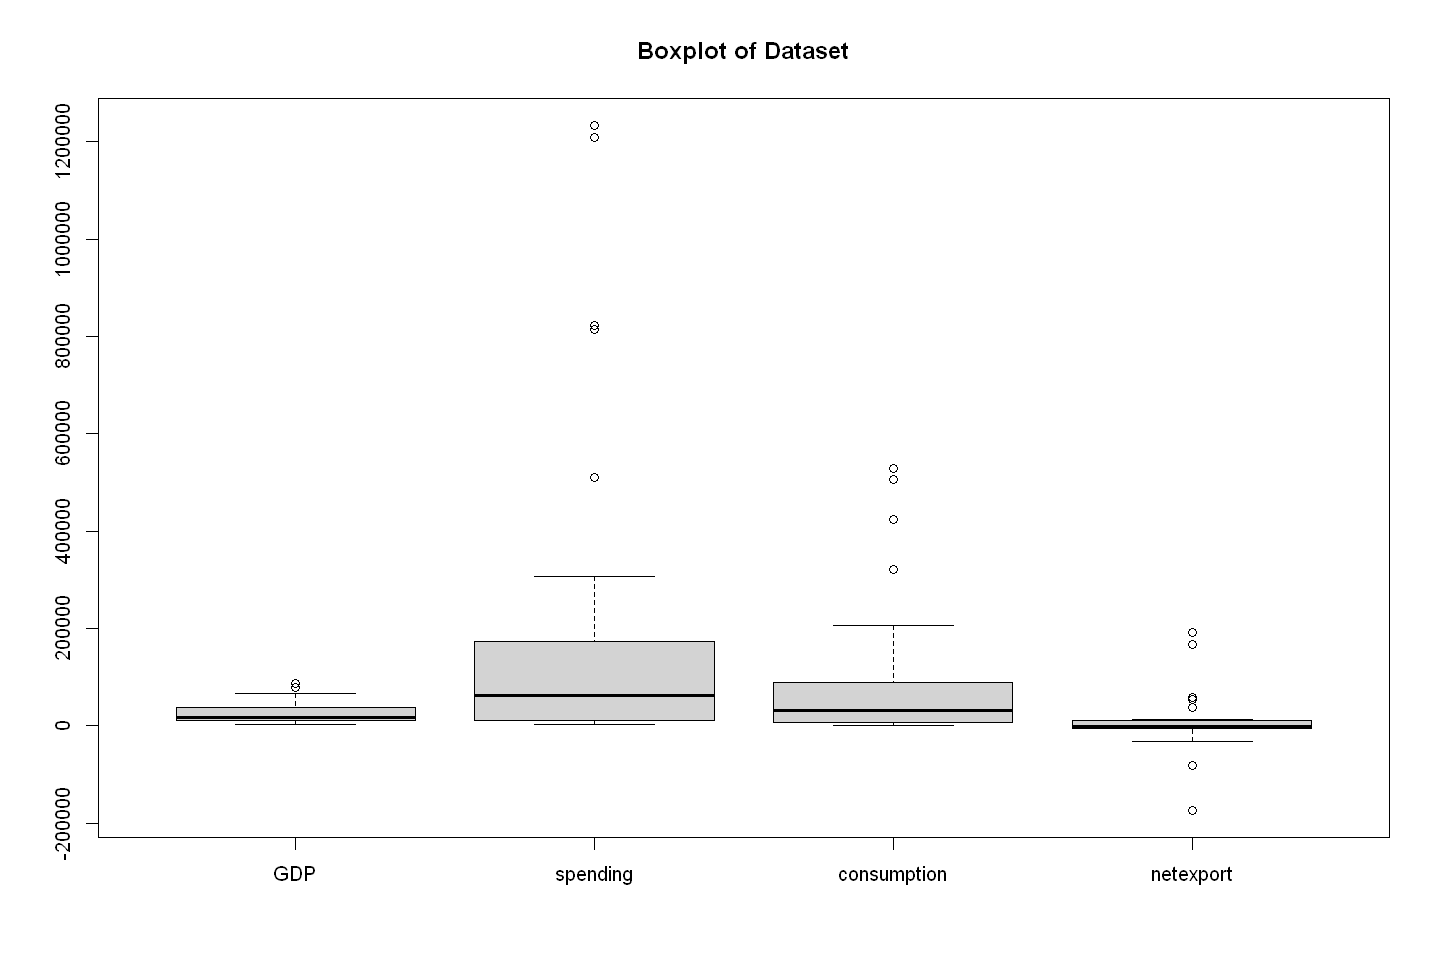

In [55]:
boxplot(numeric_data, main="Boxplot of Dataset")

In [56]:
numeric_vectors <- lapply(numeric_data, unlist)

outliers_boxplot <- lapply(numeric_vectors, function(x) boxplot.stats(x)$out)

print(outliers_boxplot)

$GDP
[1] 87540 79510

$spending
[1] 1233138  510092 1208938  821764  814962

$consumption
[1] 529210.0 505817.9 321754.0 424018.0

$netexport
[1]  191672.38  -82274.91   37616.94   53274.41   57302.18  166840.00 -173553.72



In [57]:
values_to_find <- c(87540, 79510)

row_numbers <- which(data$GDP %in% values_to_find)

print(row_numbers)

[1] 21 27


In [58]:
values_to_find <- c(1233138,  510092, 1208938,  821764,  814962)

row_numbers <- which(data$spending %in% values_to_find)

print(row_numbers)

[1]  8 12 19 36


In [59]:
values_to_find <- c(529210.0, 505817.9, 321754.0, 424018.0)

row_numbers <- which(data$consumption %in% values_to_find)

print(row_numbers)

[1]  8 14 19 35


In [60]:
values_to_find <- c(191672.38,  -82274.91,   37616.94,   53274.41,   57302.18,  166840.00, -173553.72)

row_numbers <- which(round(numeric_data$netexport, digits = 2) %in% values_to_find)

print(row_numbers)

[1]  8 14 17 26 27 35 36


Vidíme, že pro každý jednotlivý sloupec máme víc odlehlých pozorování, která ovlivnují naše modely.

Ted prozkoumáme multikolinearity našich dat

In [61]:
library(car)

vif(model_log)

Warning message:
"package 'car' was built under R version 4.3.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.3.3"

Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




log_spending log_consumption   log_netexport      Euro_Usage 
       4.845267        6.577226        2.755980        1.112687

My jsme zjistili VIF hodnoty logaritmicky transformovaných dat. VIF hondoty, které je méně než 5 indikují nízkou multikolinearity. Takové regresory jsou log_netexport, euro_usage. Log_spending má skoro vif hodnotu rovnou 5, ale necháme je. Log_consumption má VIF hodnotu rovnou 6.6, což znamená, že má střední multikolinearity, proto můžeme je nesmíme používat pro další modely.

### Ověření předpokladů lepšího modelu

Náš nejlepší model doposud je model logaritmická regrese. Předpoklady logaritmického regresního modelu jsou linearita, normalita reziduí, homoskedasticita, nezávislost reziduí a multikolinearita, kterou jsme již prozkoumali.

#### Ověření linearity

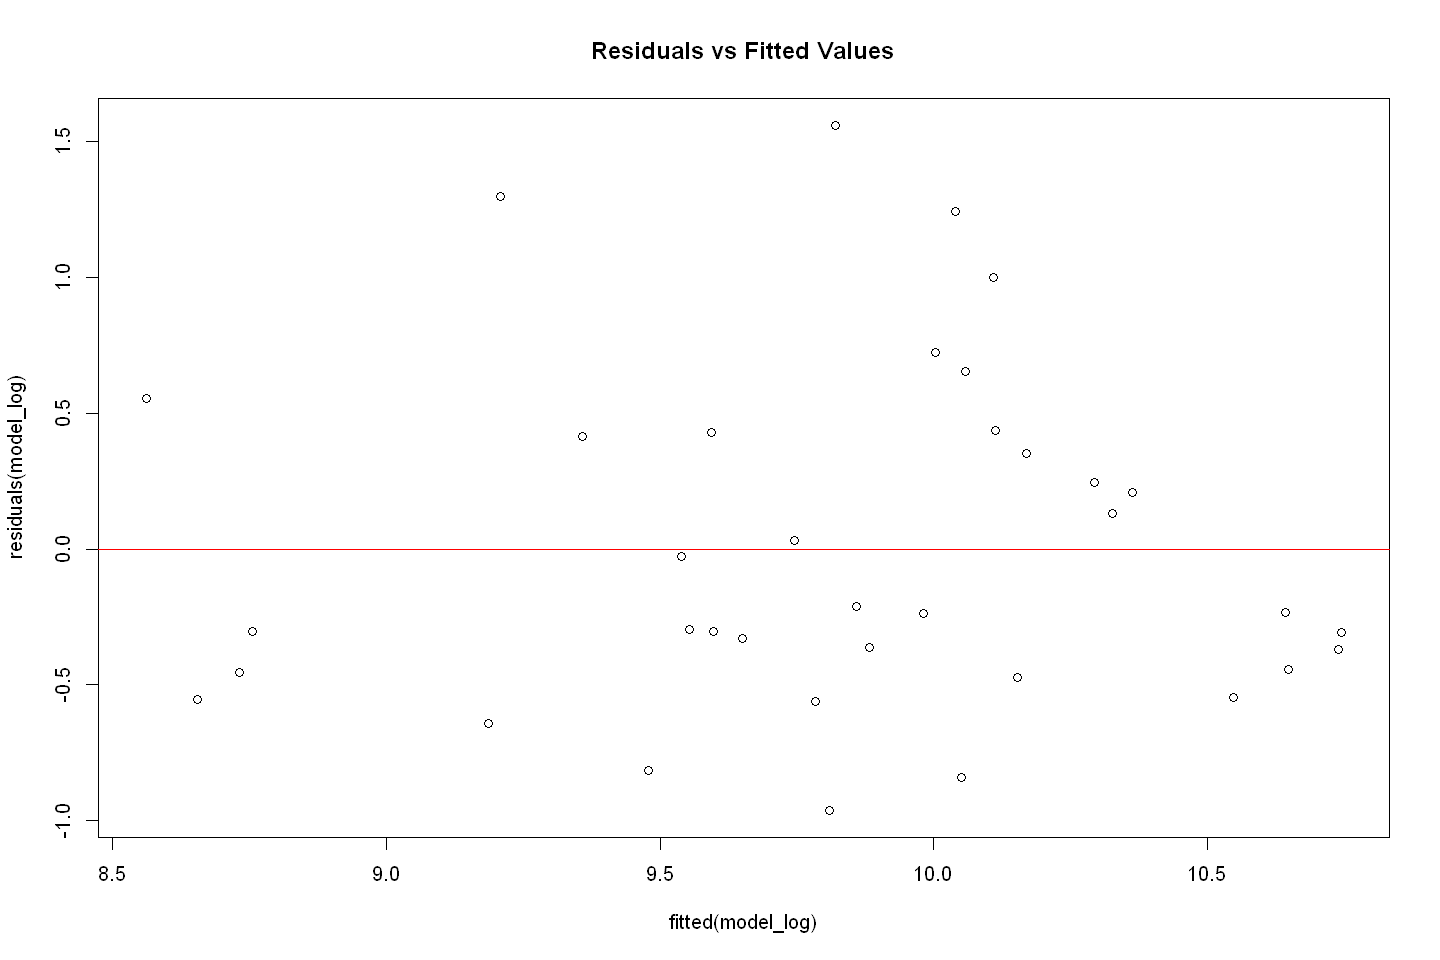

In [62]:
plot(fitted(model_log), residuals(model_log), main = "Residuals vs Fitted Values")
abline(h = 0, col = "red")

Rezidua jsou náhodně rozptýlena kolem vodorovné přímky bez zřetelného vzoru, což naznačuje to, že předpoklad linearity modelu je platný.

#### Ověření homoskedasticity

In [63]:
bptest(model_log)


	studentized Breusch-Pagan test

data:  model_log
BP = 4.1206, df = 4, p-value = 0.3899


Protože p-hodnota (0.3899) je vyšší než 0.05 na hladině významnosti 5%, nulovou hypotézu o homoskedasticitě nezamítáme. To naznačuje, že neexistuje silný důkaz pro závěr, že rozptyl reziduí není konstantní na všech úrovních nezávislých proměnných.

#### Ověření nezávislosti reziduí

In [64]:
dwtest(model_log)


	Durbin-Watson test

data:  model_log
DW = 2.2118, p-value = 0.7375
alternative hypothesis: true autocorrelation is greater than 0


Výsledky Durbin-Watsonova testu naznačují, že v reziduích našeho modelu neexistuje žádný významný důkaz autokorelace. To podporuje předpoklad nezávislosti reziduí.

### Ověření normality


	Shapiro-Wilk normality test

data:  resid(model_log)
W = 0.93248, p-value = 0.02978


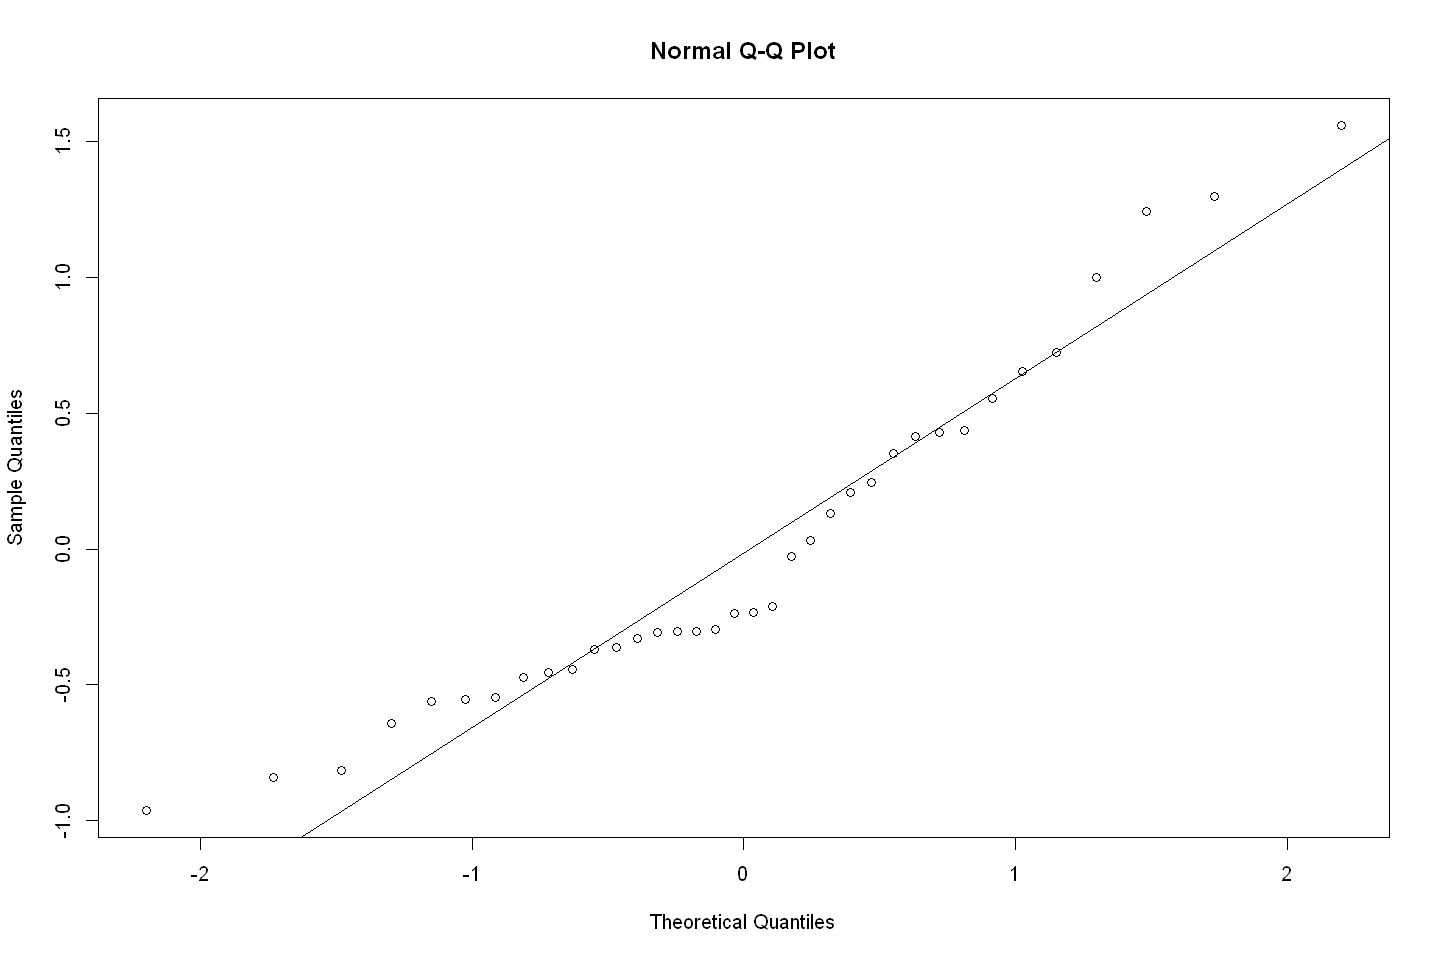

In [65]:
# Q-Q plot
qqnorm(resid(model_log))
qqline(resid(model_log))

# Shapiro-Wilk test
shapiro.test(resid(model_log))

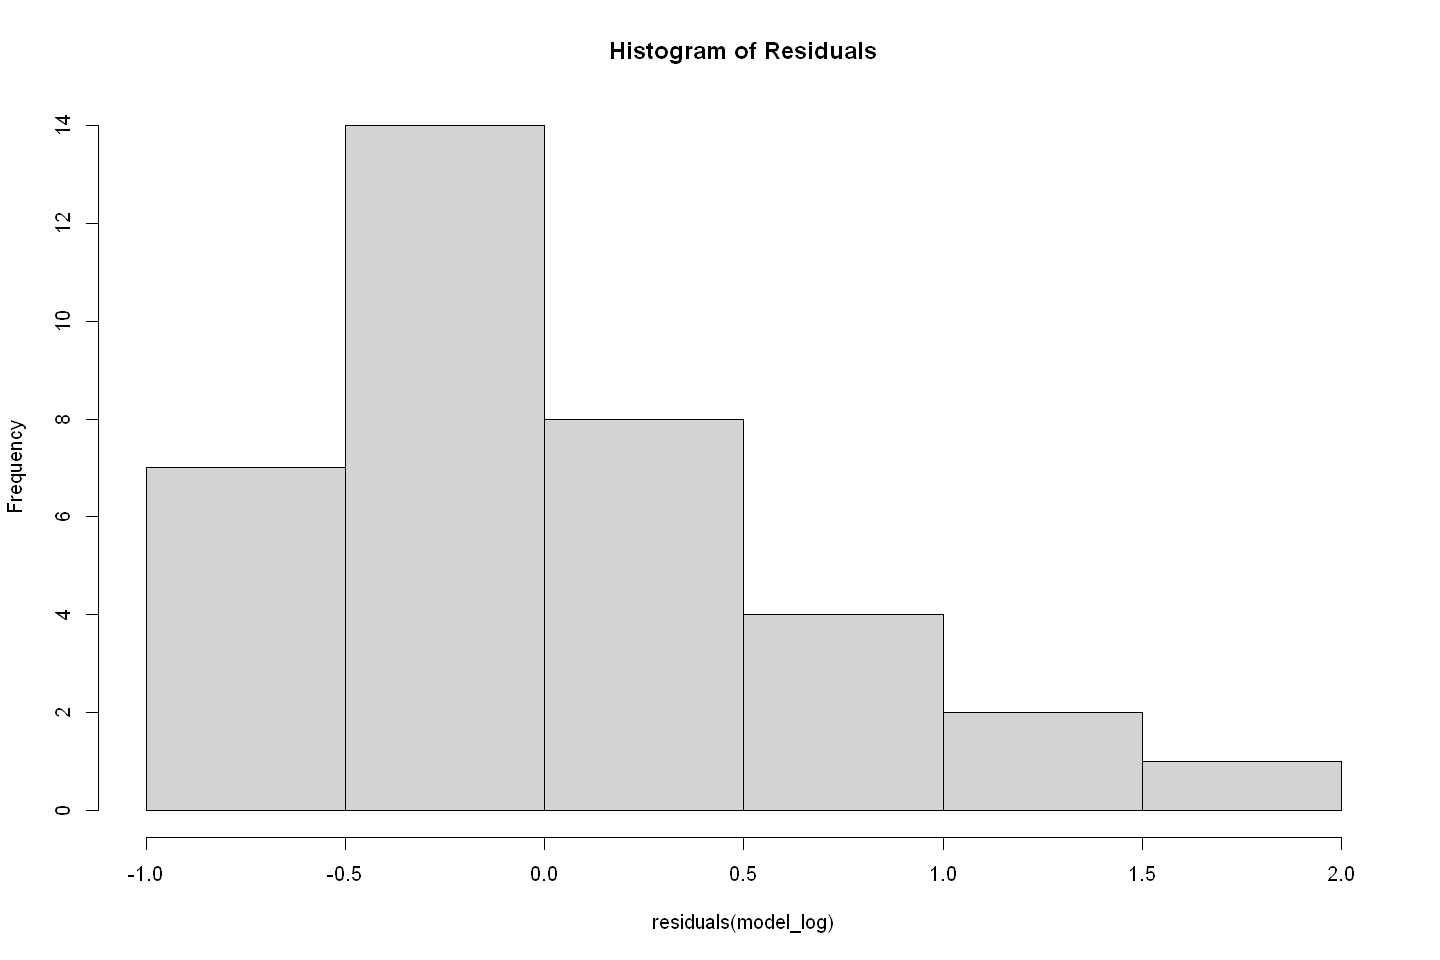

In [66]:
hist(residuals(model_log), main = "Histogram of Residuals")

Výsledky Shapiro-Wilkova testu naznačují, že existuje významný důkaz, že rezidua nejsou normálně rozdělena. To porušuje předpoklad normality reziduí v
našem regresním modelu.

### Návrh nových modelů splnujících předpoklady

Z výsledků testů předpokladů jsem zjistili, že jen jediný test ověření normality není splněn. Zkusíme tedy navrhnout a zkusit jiné modely, které budou tuto podmínku splnovat nebo schopny nějak kompenzovat. 

Na začátku chceme prozkoumat, jak se bude chovat model robustní regrese, protože máme několik odlehlých pozorováni.

In [67]:
fit_robust <- lmrob(GDP~spending+consumption+netexport+Euro_Usage, data = data)
summary(fit_robust)


Call:
lmrob(formula = GDP ~ spending + consumption + netexport + Euro_Usage, data = data)
 \--> method = "MM"
Residuals:
    Min      1Q  Median      3Q     Max 
-212738   -8094   -1525   11664   76547 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.580e+04  5.461e+03   2.892 0.006938 ** 
spending       2.883e-01  6.794e-02   4.243 0.000185 ***
consumption   -5.236e-01  1.290e-01  -4.058 0.000311 ***
netexport      8.025e-01  2.148e-01   3.735 0.000758 ***
Euro_UsageYes -1.162e+03  5.795e+03  -0.200 0.842400    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Robust residual standard error: 9789 
Multiple R-squared:  0.619,	Adjusted R-squared:  0.5698 
Convergence in 22 IRWLS iterations

Robustness weights: 
 4 observations c(8,19,21,35) are outliers with |weight| = 0 ( < 0.0028); 
 3 weights are ~= 1. The remaining 29 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6070  0.8109  0.9243  0.8808  0

Dostali jsme lepší hodnoty Multiple R-squared and Adjusted R-squared než předchozí logaritmický model, ale obsahuje nevýznamný regresor - Euro_Usage. Zkusím vyhodit nesignifikántí regresor.

In [68]:
fit_robust_woeuro <- lmrob(GDP~spending+consumption+netexport, data = data)
summary(fit_robust_woeuro)


Call:
lmrob(formula = GDP ~ spending + consumption + netexport, data = data)
 \--> method = "MM"
Residuals:
   Min     1Q Median     3Q    Max 
-12865  -6293  -1800  17721  71017 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.636e+04  3.806e+03   4.298 0.000151 ***
spending     2.818e-02  7.987e-03   3.528 0.001292 ** 
consumption -2.793e-02  1.979e-02  -1.411 0.167921    
netexport    2.573e-02  3.693e-02   0.697 0.490981    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Robust residual standard error: 10480 
Multiple R-squared:  0.2332,	Adjusted R-squared:  0.1613 
Convergence in 12 IRWLS iterations

Robustness weights: 
 2 observations c(21,27) are outliers with |weight| = 0 ( < 0.0028); 
 3 weights are ~= 1. The remaining 31 ones are summarized as
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.008182 0.797100 0.936200 0.856400 0.989600 0.998800 
Algorithmic parameters: 
       tuning.chi                bb      

Dostali jsme víc horší model, který má velmi malé hodnoty R-squared a jen jeden významný komponent.

Zkusíme použít model robustni regrese se specifikovanou Huberovou funkcí.

In [69]:
fit_rlm=rlm(GDP~spending+consumption+netexport+Euro_Usage,data=data,psi=psi.huber)
summary(fit_rlm)


Call: rlm(formula = GDP ~ spending + consumption + netexport + Euro_Usage, 
    data = data, psi = psi.huber)
Residuals:
   Min     1Q Median     3Q    Max 
-15890 -10118  -3976  13002  66509 

Coefficients:
              Value      Std. Error t value   
(Intercept)   19132.4494  4149.5318     4.6107
spending          0.0339     0.0210     1.6173
consumption      -0.0497     0.0512    -0.9705
netexport         0.0590     0.0692     0.8524
Euro_UsageYes  2004.0015  5536.1517     0.3620

Residual standard error: 15790 on 31 degrees of freedom

In [70]:
f.robftest(fit_rlm,var="spending")
f.robftest(fit_rlm,var="consumption")
f.robftest(fit_rlm,var="netexport")


	robust F-test (as if non-random weights)

data:  from rlm(formula = GDP ~ spending + consumption + netexport + Euro_Usage, from     data = data, psi = psi.huber)
F = 2.6842, p-value = 0.1115
alternative hypothesis: true spending is not equal to 0



	robust F-test (as if non-random weights)

data:  from rlm(formula = GDP ~ spending + consumption + netexport + Euro_Usage, from     data = data, psi = psi.huber)
F = 0.96876, p-value = 0.3326
alternative hypothesis: true consumption is not equal to 0



	robust F-test (as if non-random weights)

data:  from rlm(formula = GDP ~ spending + consumption + netexport + Euro_Usage, from     data = data, psi = psi.huber)
F = 0.73435, p-value = 0.3981
alternative hypothesis: true netexport is not equal to 0


Z výsledků robustních testů vidíme, že všechny regresory nejsou signifikántní, proto budeme dál zkoumat modely.

Zkusím metodu step-wise, která bude na základě AIC vybírat nejlepší model.

In [71]:
stepwise_model <- stepAIC(lm(GDP ~ spending + netexport + Euro_Usage, data = data), direction = "both")
summary(stepwise_model)

Start:  AIC=720.31
GDP ~ spending + netexport + Euro_Usage

             Df Sum of Sq        RSS    AIC
- Euro_Usage  1  22231651 1.4128e+10 718.37
- netexport   1  62427100 1.4169e+10 718.47
- spending    1 616733377 1.4723e+10 719.85
<none>                    1.4106e+10 720.31

Step:  AIC=718.37
GDP ~ spending + netexport

             Df Sum of Sq        RSS    AIC
- netexport   1  66176125 1.4195e+10 716.53
- spending    1 699080206 1.4828e+10 718.10
<none>                    1.4128e+10 718.37
+ Euro_Usage  1  22231651 1.4106e+10 720.31

Step:  AIC=716.53
GDP ~ spending

             Df Sum of Sq        RSS    AIC
- spending    1 687093715 1.4882e+10 716.24
<none>                    1.4195e+10 716.53
+ netexport   1  66176125 1.4128e+10 718.37
+ Euro_Usage  1  25980676 1.4169e+10 718.47

Step:  AIC=716.24
GDP ~ 1

             Df Sum of Sq        RSS    AIC
<none>                    1.4882e+10 716.24
+ spending    1 687093715 1.4195e+10 716.53
+ Euro_Usage  1 110564026 1.4771e+10 7


Call:
lm(formula = GDP ~ 1, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-22274 -15186  -7989  11084  61966 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    25574       3437   7.441 1.04e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 20620 on 35 degrees of freedom


Tato metoda říká, že nejlpeší je model, který obsahuje jen intercept. Zkoumáme jiné modely.

In [72]:
model_int <- lm(GDP ~ spending*consumption*netexport*Euro_Usage, data=data)
summary(model_int)


Call:
lm(formula = GDP ~ spending * consumption * netexport * Euro_Usage, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-19283  -6865  -2174   3378  63911 

Coefficients:
                                               Estimate Std. Error t value Pr(>|t|)
(Intercept)                                   1.795e+04  1.456e+04   1.233    0.232
spending                                      4.982e-01  4.108e-01   1.213    0.239
consumption                                  -1.418e+00  1.623e+00  -0.874    0.393
netexport                                     8.374e-01  2.167e+00   0.386    0.703
Euro_UsageYes                                 5.106e+03  1.587e+04   0.322    0.751
spending:consumption                          2.754e-06  3.947e-06   0.698    0.493
spending:netexport                           -6.139e-06  2.886e-05  -0.213    0.834
consumption:netexport                         5.327e-06  4.725e-06   1.127    0.273
spending:Euro_UsageYes                       -7.911e

In [73]:
anova(model1, model_int)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,31,13516789518,NA,NA,NA,NA
2,20,6923709169,11,6593080349,1.731358,0.1378688


Vidíme, že podle p-hodnoty mezi modely není statisticky významný rozdíl.

Zkusíme zjistit, zda by nám logaritmická regrese nějak pomohla.

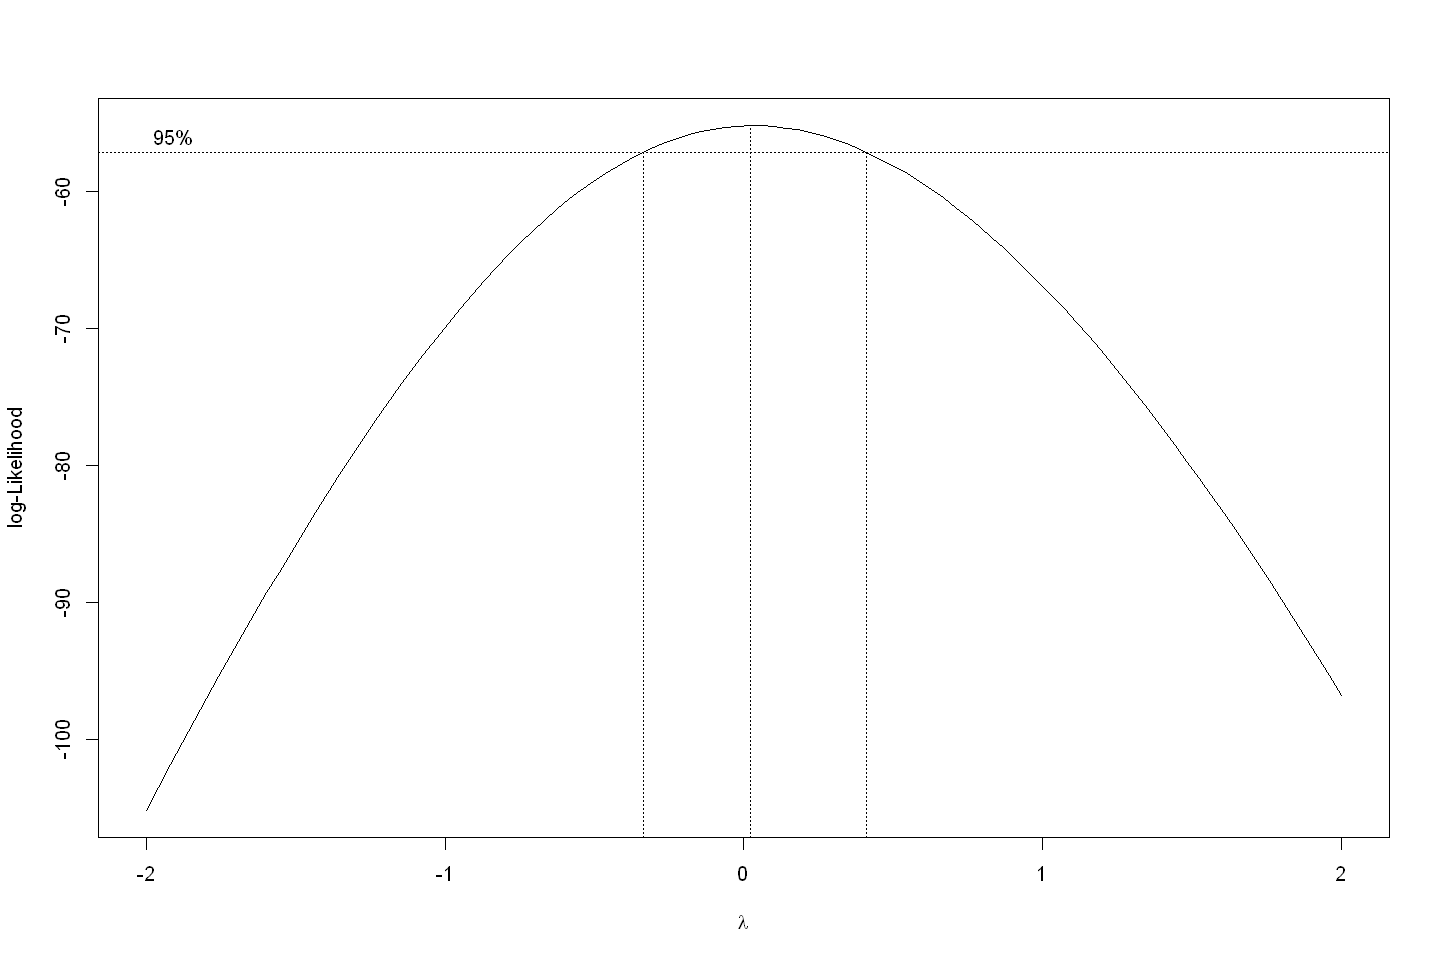

In [74]:
boxcox(lm(GDP ~ spending + netexport + Euro_Usage,data=data))

Podle BoxCox vidím, že můžeme použít logaritm. Nejprve ho zkusím na lineární regresi.

In [75]:
model_log_lin <- lm(log(GDP) ~ spending + netexport + Euro_Usage, data=data)
summary(model_log_lin)


Call:
lm(formula = log(GDP) ~ spending + netexport + Euro_Usage, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4020 -0.4619 -0.2088  0.5142  1.6173 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.502e+00  2.058e-01  46.174   <2e-16 ***
spending      8.430e-07  4.395e-07   1.918   0.0641 .  
netexport     3.376e-07  2.460e-06   0.137   0.8917    
Euro_UsageYes 3.054e-01  2.801e-01   1.090   0.2837    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8191 on 32 degrees of freedom
Multiple R-squared:  0.1589,	Adjusted R-squared:  0.08001 
F-statistic: 2.015 on 3 and 32 DF,  p-value: 0.1316


Vyhodíme nevýznamné regresory a podíváme se na zkrácený model.

In [76]:
model_log_lin_reduced <- lm(log(GDP) ~ spending, data=data)
summary(model_log_lin_reduced)


Call:
lm(formula = log(GDP) ~ spending, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5470 -0.4311 -0.0969  0.6614  1.7153 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.646e+00  1.575e-01  61.251   <2e-16 ***
spending    9.424e-07  4.244e-07   2.221   0.0331 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8098 on 34 degrees of freedom
Multiple R-squared:  0.1267,	Adjusted R-squared:  0.101 
F-statistic: 4.932 on 1 and 34 DF,  p-value: 0.03314


Tento model má velmi malé hodnoty Multiple R-squared (0.1267) a Adjusted R-squared (0.101). Koukneme na robustní regrese logaritmicky transformované vysvětlovaní proměnné.

In [77]:
model_log_rob <- lmrob(log(GDP)~spending+netexport+Euro_Usage, data = data)
summary(model_log_rob)


Call:
lmrob(formula = log(GDP) ~ spending + netexport + Euro_Usage, data = data)
 \--> method = "MM"
Residuals:
    Min      1Q  Median      3Q     Max 
-1.3618 -0.3958 -0.2013  0.5422  1.6832 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.461e+00  2.790e-01  33.911  < 2e-16 ***
spending       8.160e-07  2.481e-07   3.289  0.00245 ** 
netexport     -1.550e-08  1.310e-06  -0.012  0.99063    
Euro_UsageYes  3.390e-01  3.076e-01   1.102  0.27857    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Robust residual standard error: 0.7878 
Multiple R-squared:  0.1609,	Adjusted R-squared:  0.08224 
Convergence in 16 IRWLS iterations

Robustness weights: 
 2 weights are ~= 1. The remaining 34 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6273  0.8494  0.9635  0.9124  0.9882  0.9977 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol           rel.tol        

Zase vyhodíme nesignifikántní regresory.

In [78]:
model_log_rob_reduced <- lmrob(log(GDP)~spending, data = data)
summary(model_log_rob_reduced)


Call:
lmrob(formula = log(GDP) ~ spending, data = data)
 \--> method = "MM"
Residuals:
     Min       1Q   Median       3Q      Max 
-1.54150 -0.41824 -0.08392  0.67387  1.72130 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.641e+00  1.737e-01  55.507  < 2e-16 ***
spending    9.166e-07  2.448e-07   3.744  0.00067 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Robust residual standard error: 0.8504 
Multiple R-squared:  0.1192,	Adjusted R-squared:  0.09334 
Convergence in 8 IRWLS iterations

Robustness weights: 
 4 weights are ~= 1. The remaining 32 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6615  0.8871  0.9503  0.9165  0.9847  0.9986 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol           rel.tol         scale.tol         solve.tol          zero.tol 
        1.548e+00         5.000e-01         4.685e+00         1.000e-07         1.000e-07  

Tento model má následující hodnoty: Multiple R-squared = 0.1192, Adjusted R-squared = 0.09334.

 Tedy nejelpším modelem obsahujícím jen významné regresory podle hodnot R-squared je následující:

In [79]:
final_model <- lm(log(GDP) ~ spending, data=data)
summary(final_model)


Call:
lm(formula = log(GDP) ~ spending, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5470 -0.4311 -0.0969  0.6614  1.7153 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.646e+00  1.575e-01  61.251   <2e-16 ***
spending    9.424e-07  4.244e-07   2.221   0.0331 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8098 on 34 degrees of freedom
Multiple R-squared:  0.1267,	Adjusted R-squared:  0.101 
F-statistic: 4.932 on 1 and 34 DF,  p-value: 0.03314


Podíváme se, zda tento model splnuje předpoklad normality, krerý náš první nejlepší model nesplnoval.


	Shapiro-Wilk normality test

data:  resid(final_model)
W = 0.97826, p-value = 0.6863


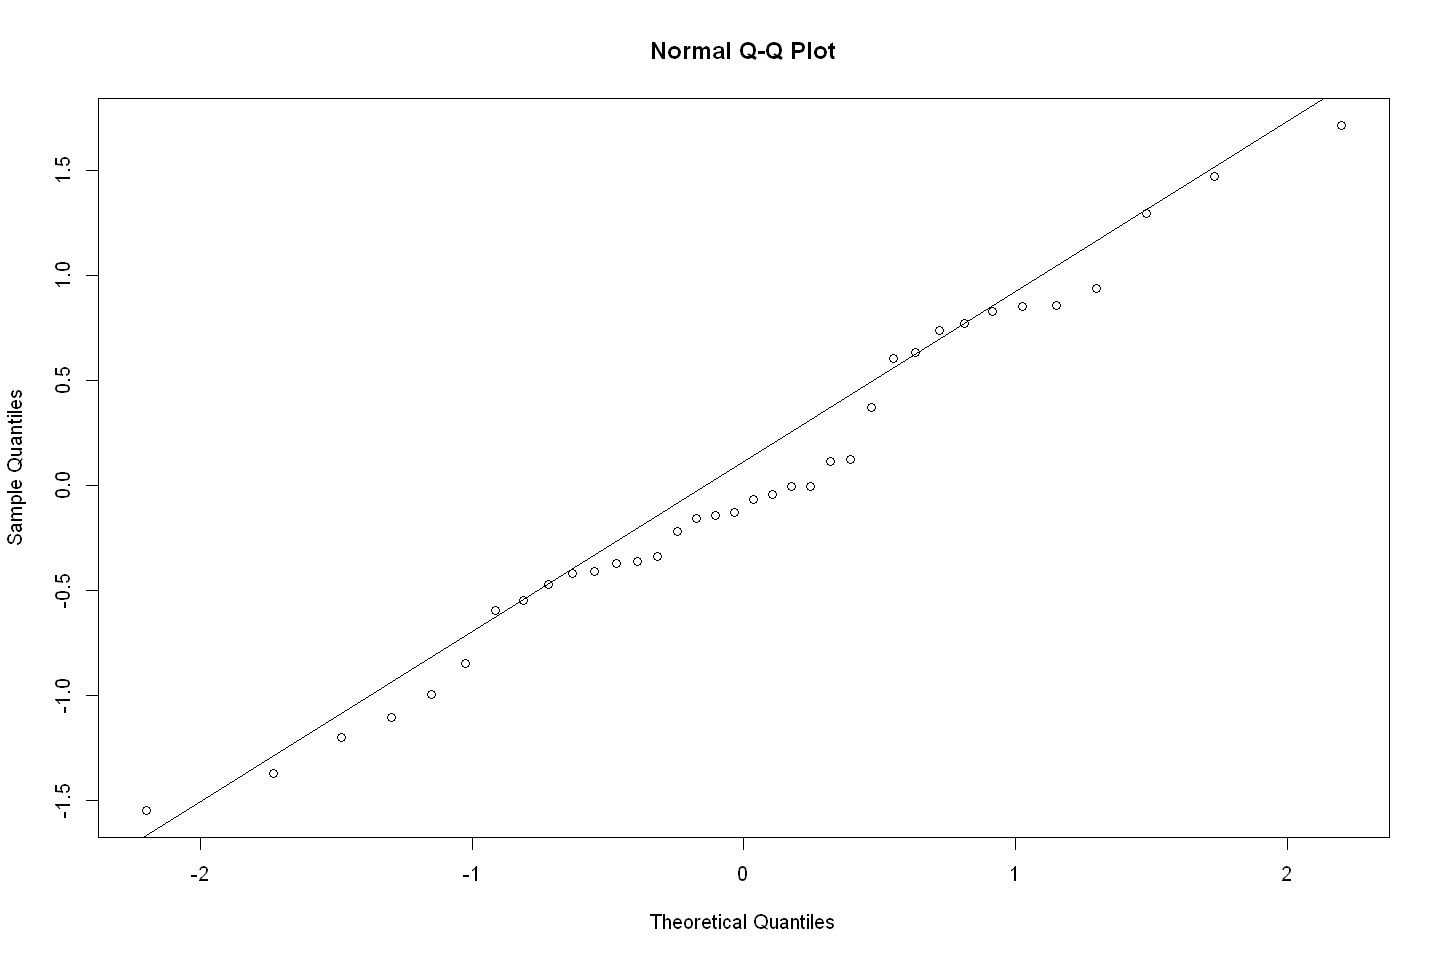

In [80]:
# Q-Q plot
qqnorm(resid(final_model))
qqline(resid(final_model))

# Shapiro-Wilk test
shapiro.test(resid(final_model))

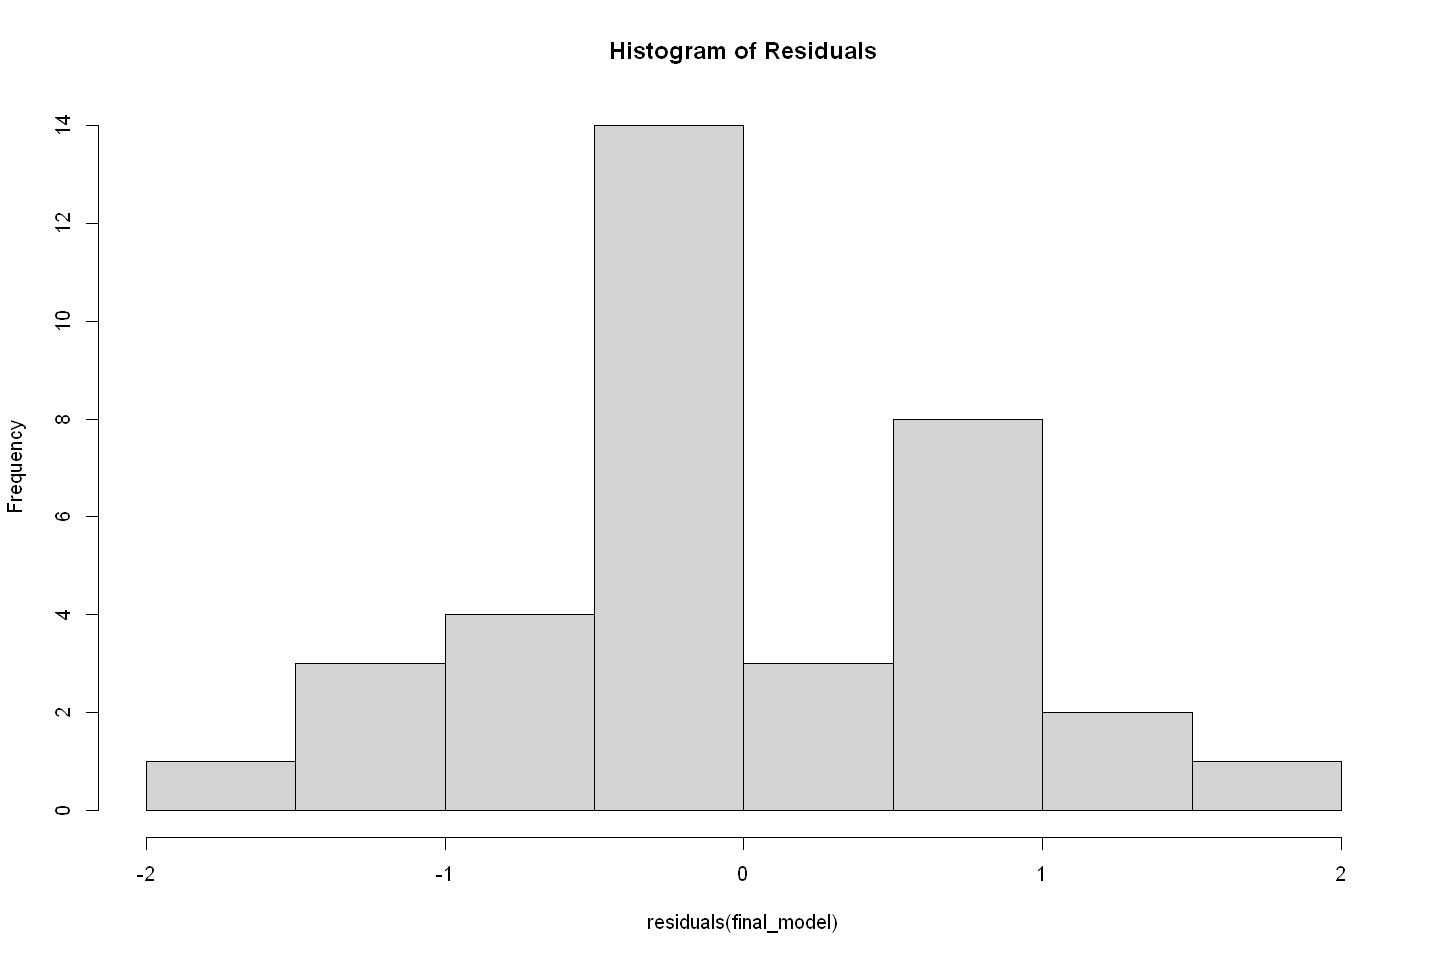

In [81]:
hist(residuals(final_model), main = "Histogram of Residuals")

Protože p-hodnota je 0,6863, což je významně více než 0.05 na hladině významnosti 5%, nulovou hypotézu nezamítáte. To znamená, že rezidua modelu final_model lze považovat za normálně rozdělená.

### Interpretace výsledků

In [82]:
summary(final_model)


Call:
lm(formula = log(GDP) ~ spending, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5470 -0.4311 -0.0969  0.6614  1.7153 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.646e+00  1.575e-01  61.251   <2e-16 ***
spending    9.424e-07  4.244e-07   2.221   0.0331 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8098 on 34 degrees of freedom
Multiple R-squared:  0.1267,	Adjusted R-squared:  0.101 
F-statistic: 4.932 on 1 and 34 DF,  p-value: 0.03314


=====================================================================================

1. Odhady regresních koeficientů:
    * Intercept: Odhadovaná logaritmická hodnota GDP, když výdaje jsou 0, je přibližně 9.646. Podle p-hodnoty je statisticky významný.
    * spending: Koeficinet pro spending je roven 9.424e-07. Při zvýšení výdajů se očekává zvýšení logaritmu GDP o 9.424e-07 jednotky.  Podle p-hodnoty je statisticky významný.

2. Kvalita modelu:
    * Rozptyl reziduí: Standardní chyba reziduí je přibližně 0.8098.
    * Multiple R-squared a Adjusted R-squared: Obyčejný koeficient determinace je roven 0.1267. Adjustovaný koeficent determinace, který bere v úvahu počet prediktorů, je přibližně 0.101.
      
=====================================================================================

In [83]:
tmp <- predict(final_model, interval = "prediction")

predict <- cbind(data, log(data$GDP))
predict <- cbind(predict, tmp)
predict

Warning message in predict.lm(final_model, interval = "prediction"):
"predictions on current data refer to _future_ responses
"


,geo,GDP,spending,consumption,netexport,Euro_Usage,log(data$GDP),fit,lwr,upr
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,AL,3300,2684.019,7470.00,-2265.70000,No,8.101678,9.648707,7.972487,11.32493
2,AT,37820,163191.900,63286.70,-9263.88850,Yes,10.540593,9.799971,8.131484,11.46846
3,BE,34770,218102.100,93853.40,5301.09722,Yes,10.456510,9.851719,8.183247,11.52019
4,BG,5780,14476.000,6672.60,-4689.01172,No,8.662159,9.659820,7.984556,11.33508
5,CH,66780,174563.900,60423.20,13383.80000,No,11.109159,9.810688,8.142315,11.47906
6,CY,22570,8205.400,3657.60,-4324.36607,Yes,10.024377,9.653910,7.978145,11.32967
7,CZ,15470,72636.100,31627.40,12164.45475,No,9.646658,9.714630,8.043185,11.38608
8,DE,34130,1233138.000,529210.00,191672.38388,Yes,10.437932,10.808302,8.913400,12.70320
9,DK,45530,147540.500,67390.50,11882.66482,No,10.726127,9.785221,8.116484,11.45396


Predikované hodnoty jsou přibližně jako logaritmické hodnoty GDP.